In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

#ploltly
from plotly.offline import init_notebook_mode, iplot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings

/kaggle/input/kontrol/kontrol.csv
/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

train = pd.read_csv("/kaggle/input/datathon2023/train.csv")
test = pd.read_csv("/kaggle/input/datathon2023/test_x.csv")
train.drop(columns="index",inplace=True)
test.drop(columns="index",inplace=True)

In [3]:
train.sample(5)

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
491     Kadın     18-30        Bekar           Lise Mezunu   
2963    Kadın     31-40        Bekar        İlkokul Mezunu   
118     Erkek     51-60         Evli        İlkokul Mezunu   
2248    Erkek     31-40         Evli           Lise Mezunu   
1361    Kadın     31-40         Evli  Yüksek Lisans Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
491   Düzenli ve Ücretli Bir İşi Var          253745.556068    Büyük Şehir   
2963  Düzenli ve Ücretli Bir İşi Var          185595.931477         Kırsal   
118   Düzenli ve Ücretli Bir İşi Var          188472.864227    Büyük Şehir   
2248  Düzenli ve Ücretli Bir İşi Var          229780.892904         Kırsal   
1361  İşsiz veya Düzenli Bir İşi Yok          180399.080611         Kırsal   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
491                           Kozmetik                         8244.484458   
2963                     Ev ve Mobilya                         4315.340985   
118   Elektronik ve Teknolojik Ürünler                         6387.596673   
2248                             Giyim                         4922.197600   
1361                          Kozmetik                         3930.745174   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
491                                    58.167678                    Ediyor   
2963                                   22.983493                   Etmiyor   
118                                    17.714871                   Etmiyor   
2248                                    3.696052                   Etmiyor   
1361                                   19.876687                   Etmiyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
491     obek_8                                185.987962  
2963    obek_2                                 60.959151  
118     obek_3                                 18.150644  
2248    obek_1                                 10.552417  
1361    obek_2                                 53.307584

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    5460 non-null   object 
 1   Yaş Grubu                                   5460 non-null   object 
 2   Medeni Durum                                5460 non-null   object 
 3   Eğitim Düzeyi                               5460 non-null   object 
 4   İstihdam Durumu                             5460 non-null   object 
 5   Yıllık Ortalama Gelir                       5460 non-null   float64
 6   Yaşadığı Şehir                              5460 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5460 non-null   float64
 10  Eğitime Deva

In [5]:
train.describe()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
count           5.460000e+03                         5460.000000   
mean            3.635711e+05                        16616.612217   
std             2.197144e+05                        14099.171704   
min             4.392299e+04                         2859.254000   
25%             2.156934e+05                         4931.859057   
50%             2.869254e+05                         8426.818967   
75%             4.681882e+05                        30579.244695   
max             1.192437e+06                        48605.594415   

       Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
count                                 5460.000000   
mean                                    24.040884   
std                                     14.945655   
min                                      0.000000   
25%                                     11.550502   
50%                                     20.095924   
75%                                     35.918161   
max                                     64.616196   

       Yıllık Ortalama Sepete Atılan Ürün Adedi  
count                               5460.000000  
mean                                  73.445693  
std                                   47.214184  
min                                    3.977559  
25%                                   25.009168  
50%                                   82.485579  
75%                                  104.473291  
max                                  242.308441

In [6]:
train.isna().sum()

Cinsiyet                                      0
Yaş Grubu                                     0
Medeni Durum                                  0
Eğitim Düzeyi                                 0
İstihdam Durumu                               0
Yıllık Ortalama Gelir                         0
Yaşadığı Şehir                                0
En Çok İlgilendiği Ürün Grubu                 0
Yıllık Ortalama Satın Alım Miktarı            0
Yıllık Ortalama Sipariş Verilen Ürün Adedi    0
Eğitime Devam Etme Durumu                     0
Öbek İsmi                                     0
Yıllık Ortalama Sepete Atılan Ürün Adedi      0
dtype: int64

In [7]:
print('Çift girişli gözlemler: {}'.format(train.duplicated().sum()))


Çift girişli gözlemler: 0


In [8]:
#Siparişe Dönüşüm Oranı
train["Siparişe Dönüşüm Oranı"] = train["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] / train["Yıllık Ortalama Sepete Atılan Ürün Adedi"]
train["Siparişe Dönüşüm Oranı"] = train["Siparişe Dönüşüm Oranı"].apply(lambda x: 0 if x == np.inf else x)

test["Siparişe Dönüşüm Oranı"] = test["Yıllık Ortalama Sipariş Verilen Ürün Adedi"] / test["Yıllık Ortalama Sepete Atılan Ürün Adedi"]
test["Siparişe Dönüşüm Oranı"] = test["Siparişe Dönüşüm Oranı"].apply(lambda x: 0 if x == np.inf else x)
   
#Müşteri Harcama Gücü
train["Harcama Gücü"] = train["Yıllık Ortalama Gelir"] / train["Yıllık Ortalama Satın Alım Miktarı"]
test["Harcama Gücü"] = test["Yıllık Ortalama Gelir"] / test["Yıllık Ortalama Satın Alım Miktarı"]
train.head()  


Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1    Erkek       >60         Evli           Lise Mezunu   
2    Erkek     18-30        Bekar           Lise Mezunu   
3    Erkek     51-60         Evli           Lise Mezunu   
4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  Siparişe Dönüşüm Oranı  \
0    obek_4                                102.936904                0.362461   
1    obek_5                                 82.176053                0.140611   
2    obek_8                                141.661426                0.390743   
3    obek_3                                 17.097397                0.901730   
4    obek_3                                 20.470459                0.717612   

   Harcama Gücü  
0     23.375363  
1     59.410192  
2     27.062925  
3     51.064667  
4     50.392875

<Axes: title={'center': 'Öbek 1 Eğitime Devam Durumu Dağılımı'}>

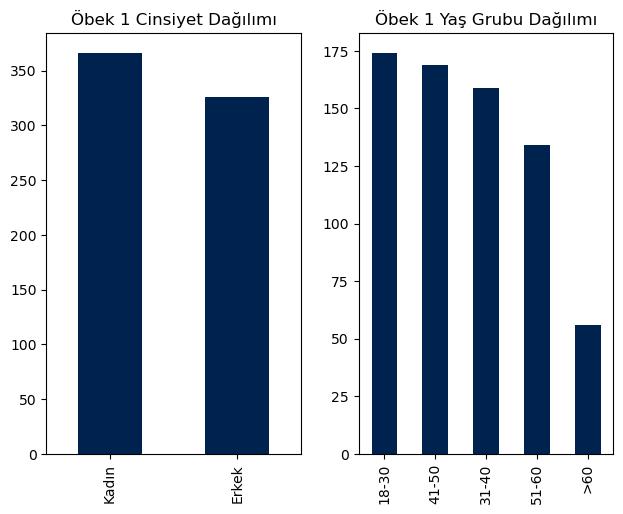

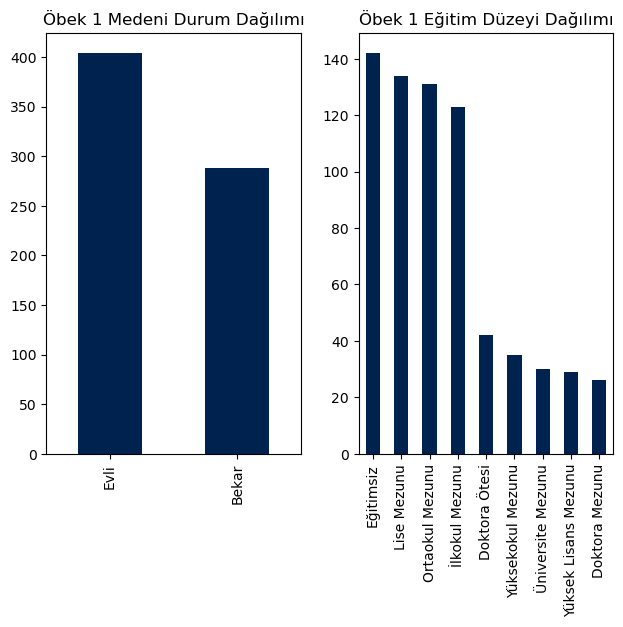

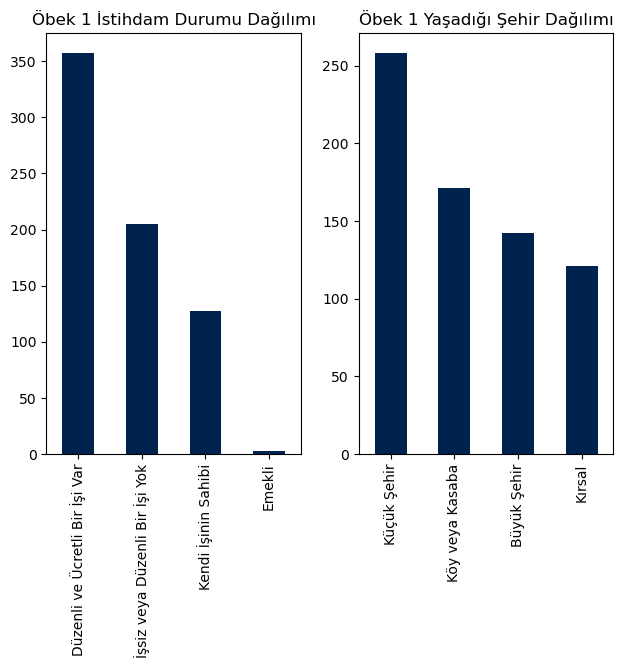

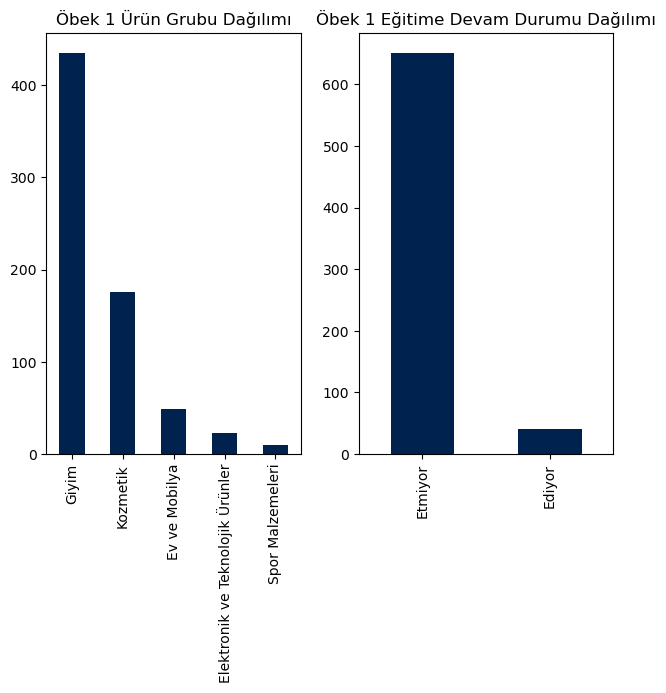

In [9]:
train_grouped_obek1= train[train['Öbek İsmi'] == 'obek_1']
train_grouped_obek1

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 1 Cinsiyet Dağılımı')
train_grouped_obek1['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 1 Yaş Grubu Dağılımı')
train_grouped_obek1['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 1 Medeni Durum Dağılımı')
train_grouped_obek1['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 1 Eğitim Düzeyi Dağılımı')
train_grouped_obek1['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 1 İstihdam Durumu Dağılımı')
train_grouped_obek1['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 1 Yaşadığı Şehir Dağılımı')
train_grouped_obek1['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 1 Ürün Grubu Dağılımı')
train_grouped_obek1['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 1 Eğitime Devam Durumu Dağılımı')
train_grouped_obek1['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

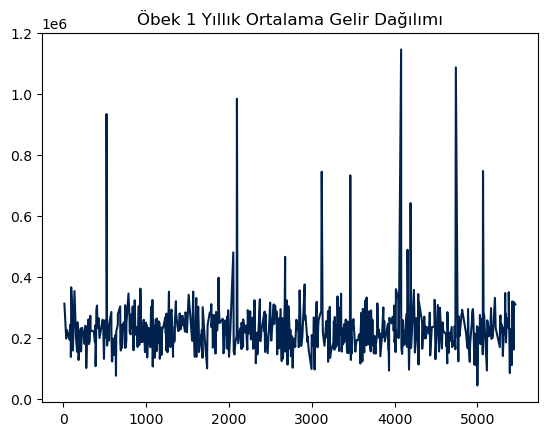

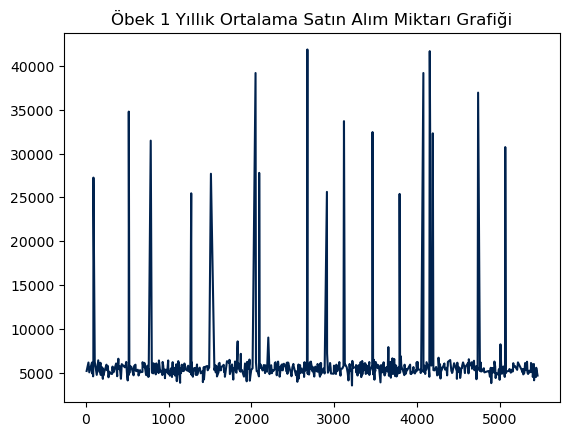

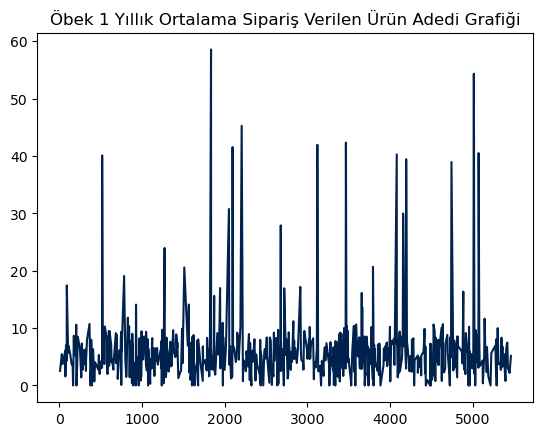

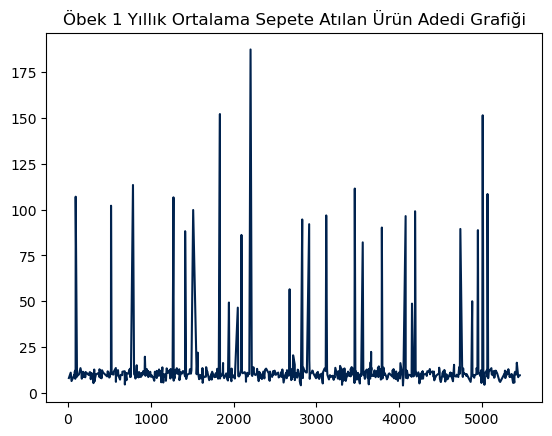

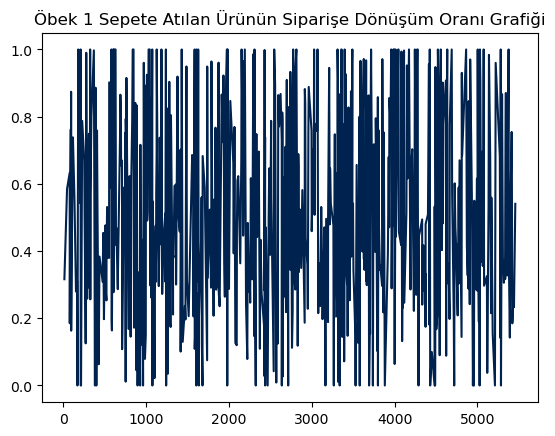

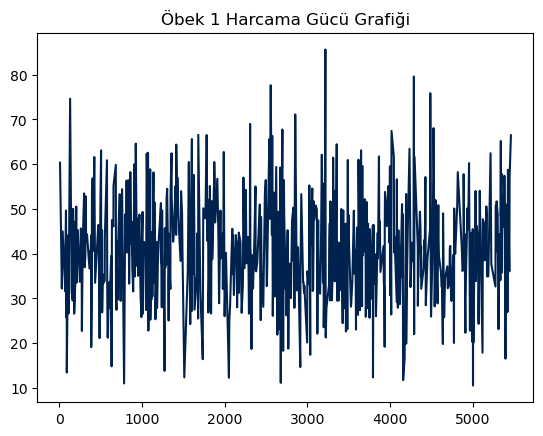

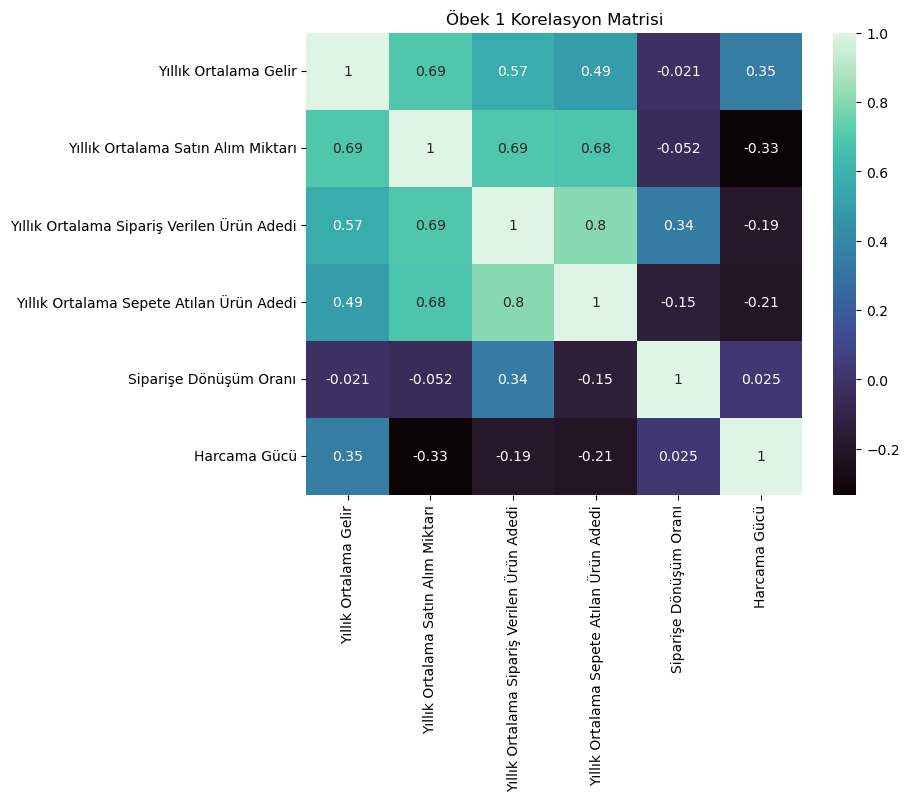

In [10]:
train_grouped_obek1['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 1 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek1['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 1 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek1['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 1 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek1['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 1 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek1['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 1 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek1['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 1 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek1[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 1 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 2 Eğitime Devam Durumu Dağılımı'}>

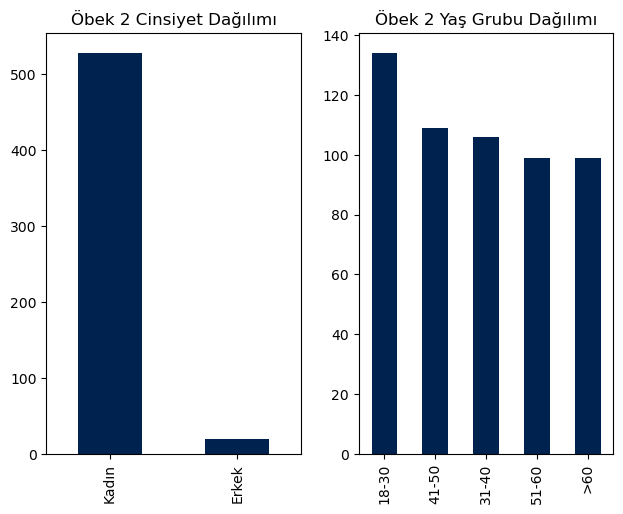

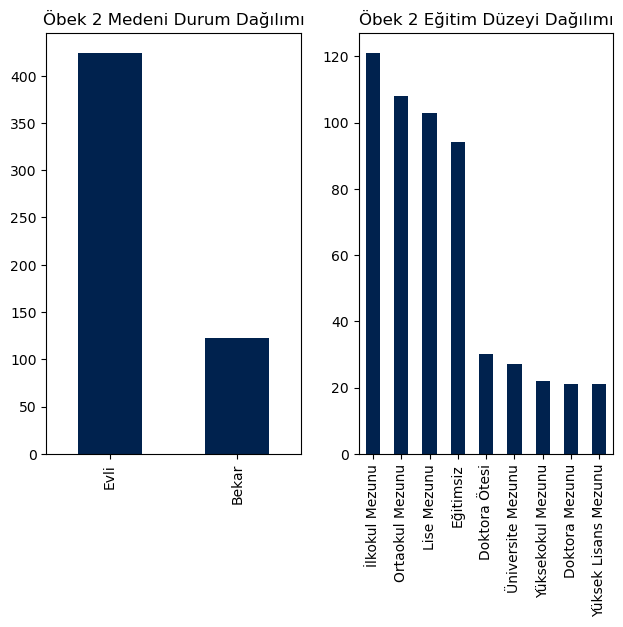

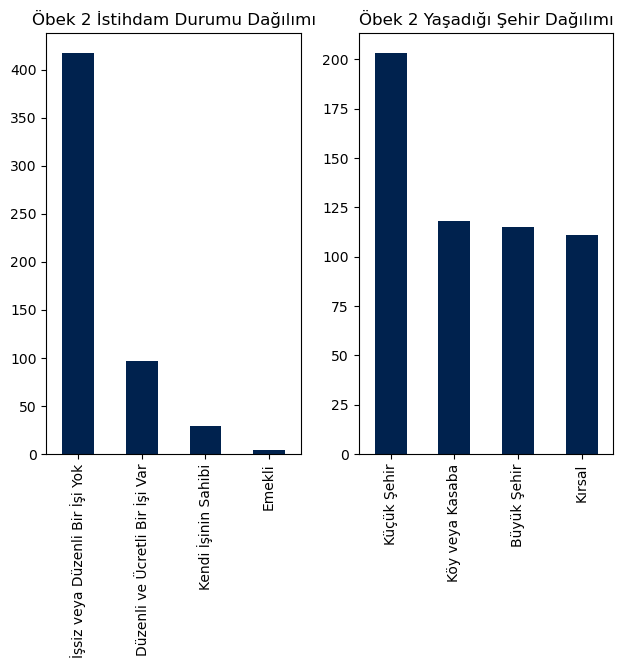

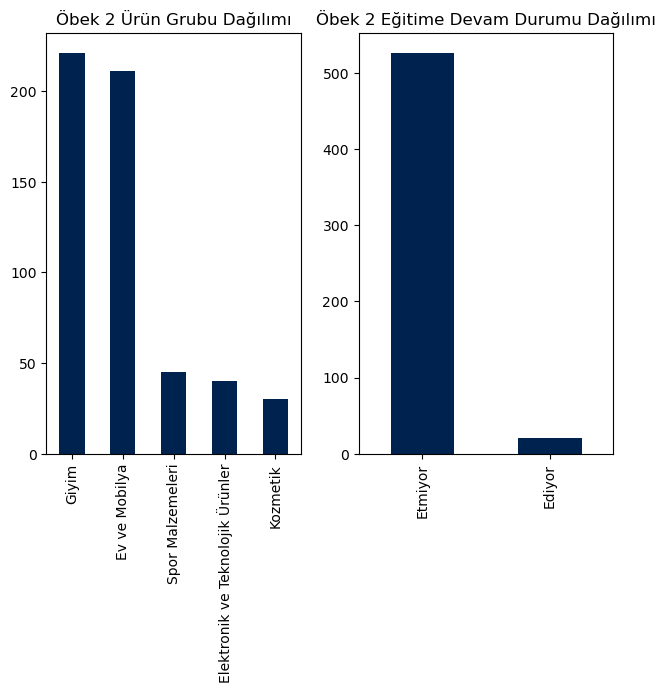

In [11]:
train_grouped_obek2= train[train['Öbek İsmi'] == 'obek_2']
train_grouped_obek2

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 2 Cinsiyet Dağılımı')
train_grouped_obek2['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 2 Yaş Grubu Dağılımı')
train_grouped_obek2['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 2 Medeni Durum Dağılımı')
train_grouped_obek2['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 2 Eğitim Düzeyi Dağılımı')
train_grouped_obek2['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 2 İstihdam Durumu Dağılımı')
train_grouped_obek2['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 2 Yaşadığı Şehir Dağılımı')
train_grouped_obek2['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 2 Ürün Grubu Dağılımı')
train_grouped_obek2['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 2 Eğitime Devam Durumu Dağılımı')
train_grouped_obek2['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

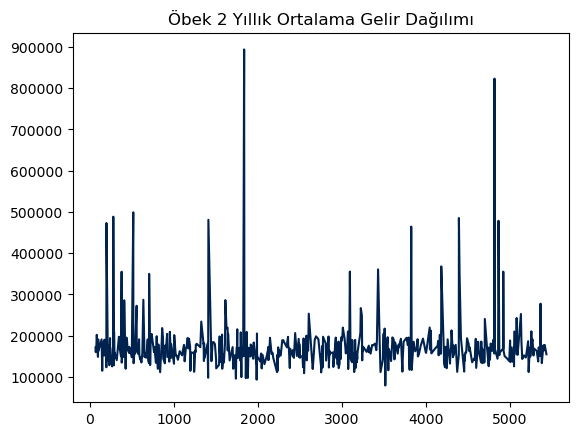

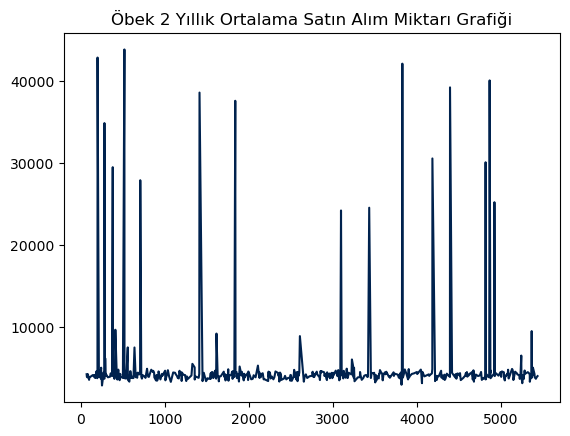

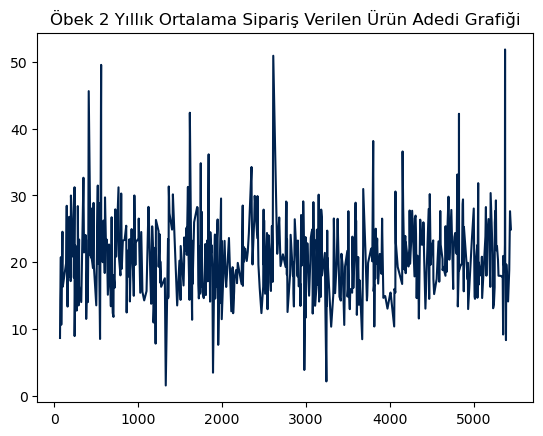

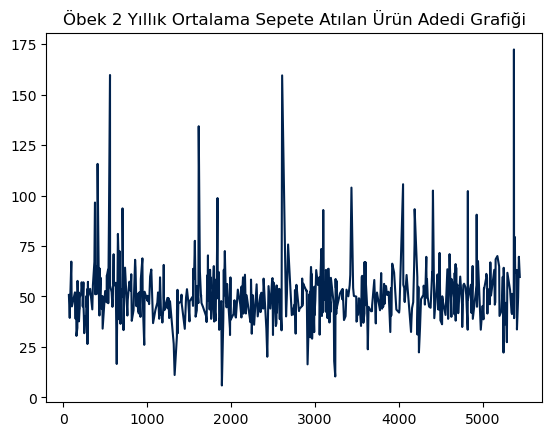

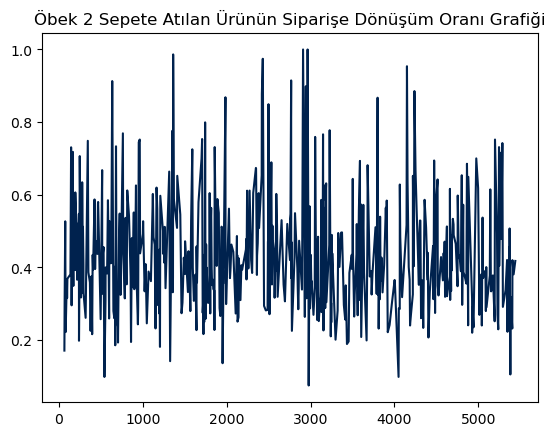

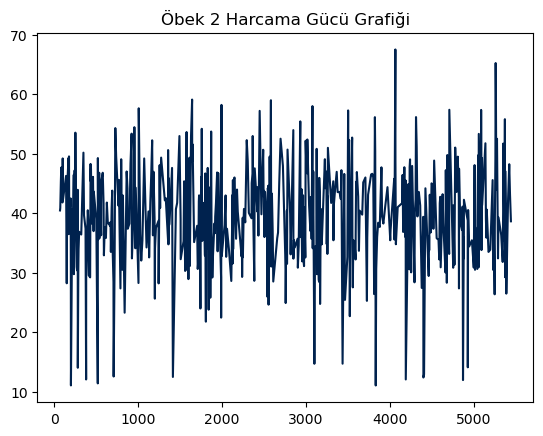

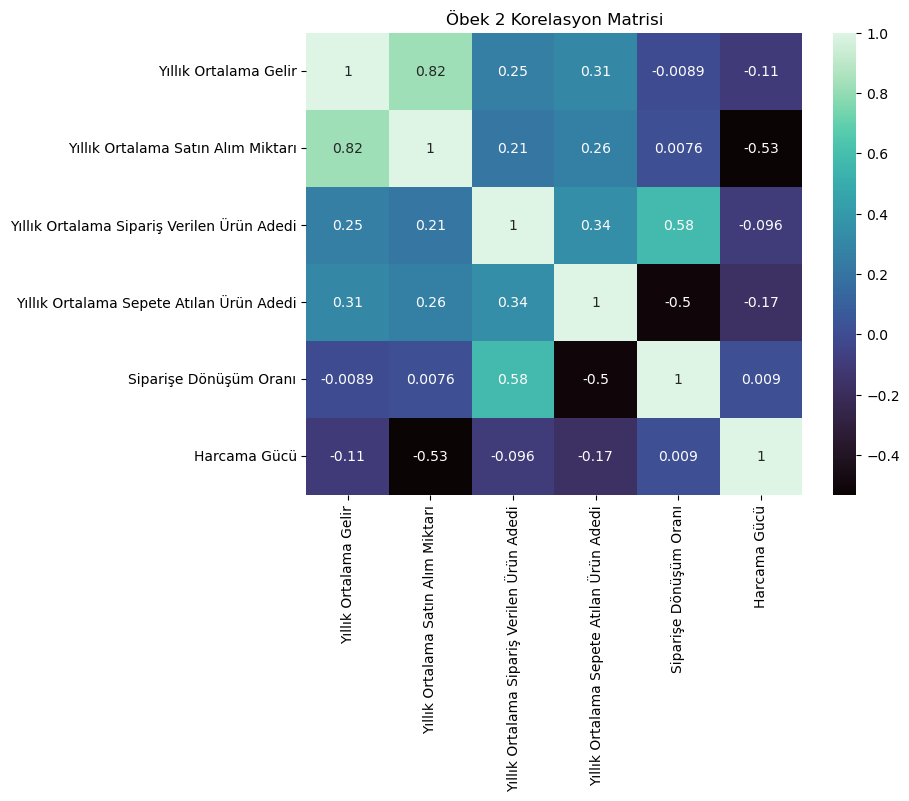

In [12]:
train_grouped_obek2['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 2 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek2['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 2 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek2['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 2 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek2['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 2 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek2['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 2 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek2['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 2 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek2[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 2 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 3 Eğitime Devam Durumu Dağılımı'}>

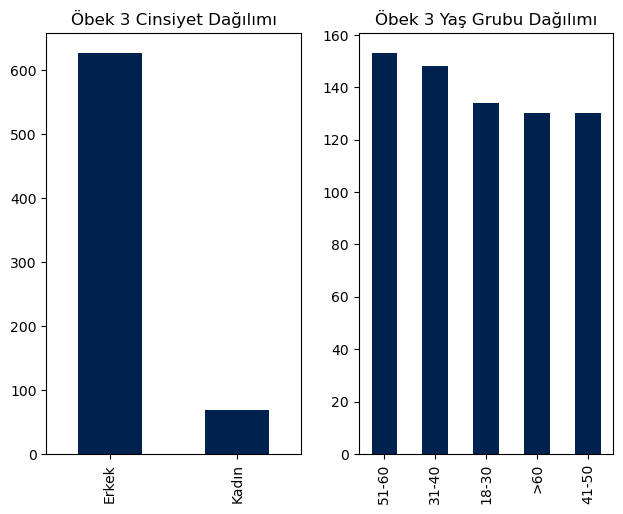

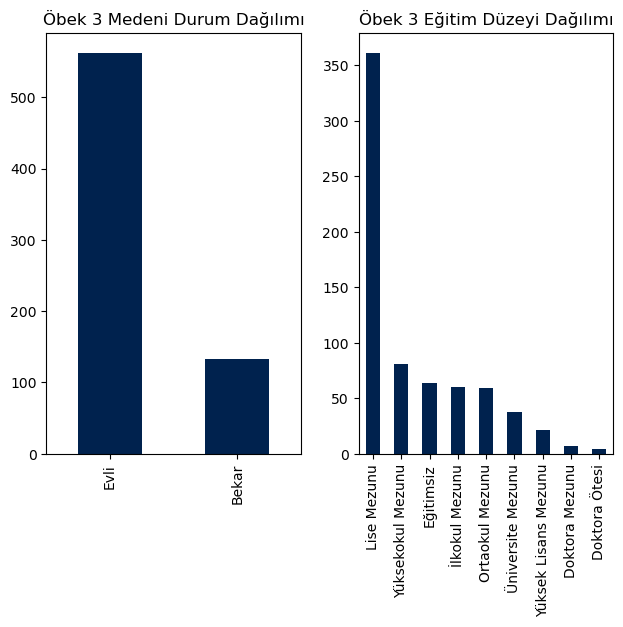

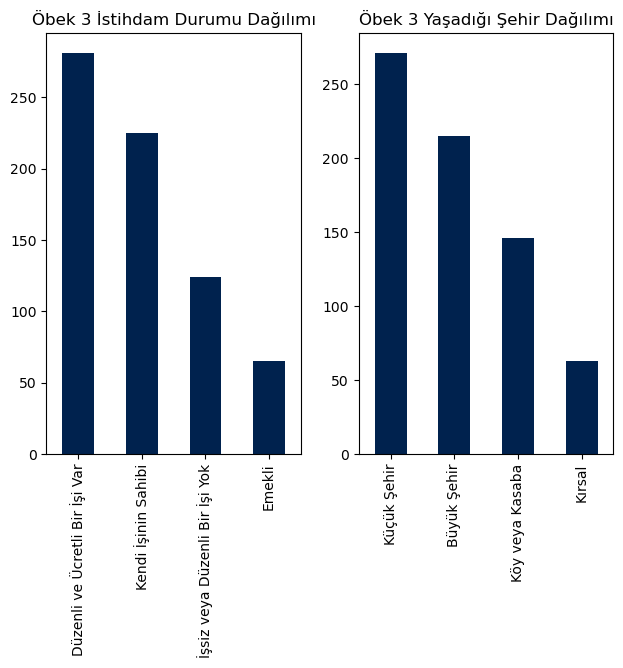

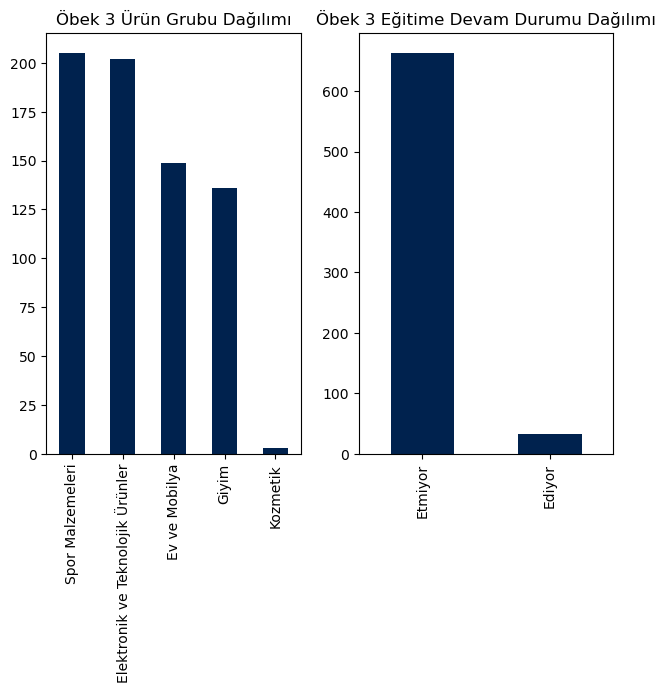

In [13]:
train_grouped_obek3= train[train['Öbek İsmi'] == 'obek_3']
train_grouped_obek3

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 3 Cinsiyet Dağılımı')
train_grouped_obek3['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 3 Yaş Grubu Dağılımı')
train_grouped_obek3['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 3 Medeni Durum Dağılımı')
train_grouped_obek3['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 3 Eğitim Düzeyi Dağılımı')
train_grouped_obek3['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 3 İstihdam Durumu Dağılımı')
train_grouped_obek3['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 3 Yaşadığı Şehir Dağılımı')
train_grouped_obek3['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 3 Ürün Grubu Dağılımı')
train_grouped_obek3['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 3 Eğitime Devam Durumu Dağılımı')
train_grouped_obek3['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

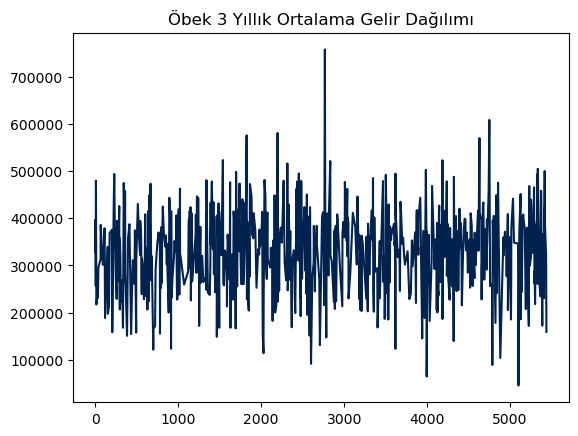

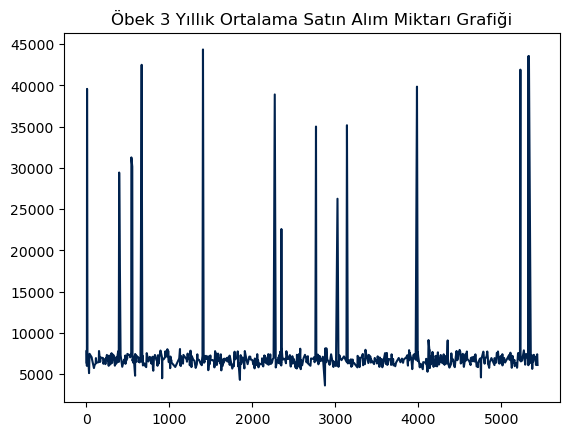

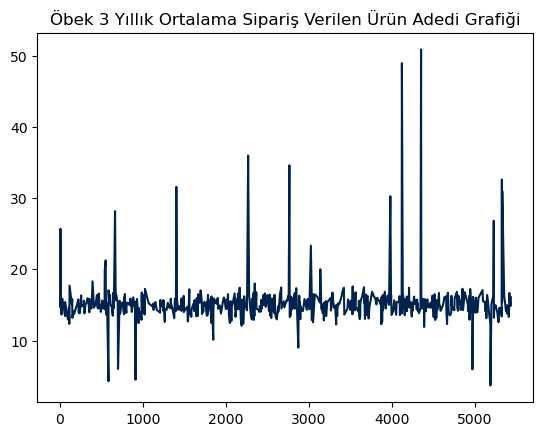

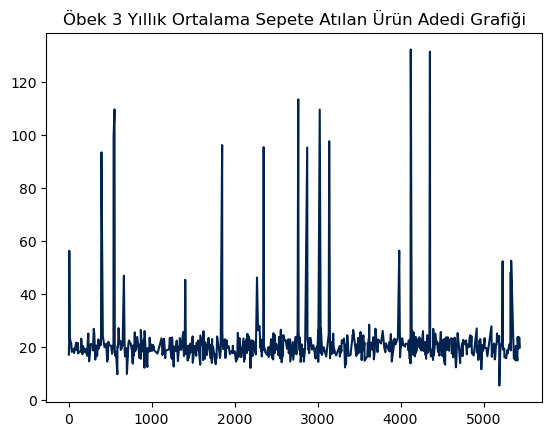

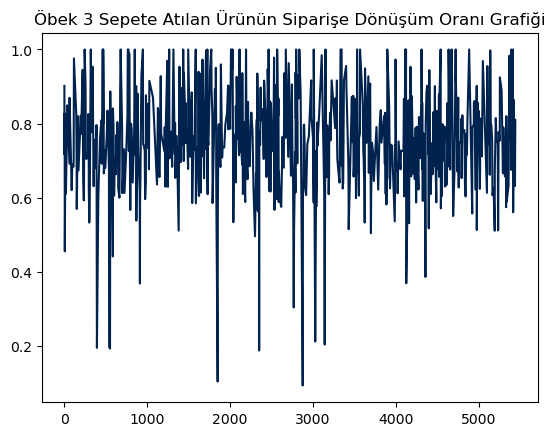

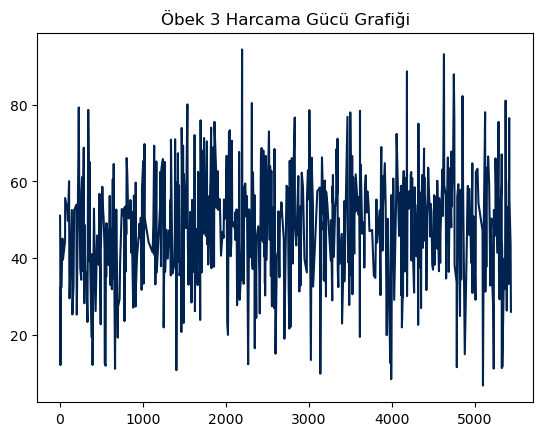

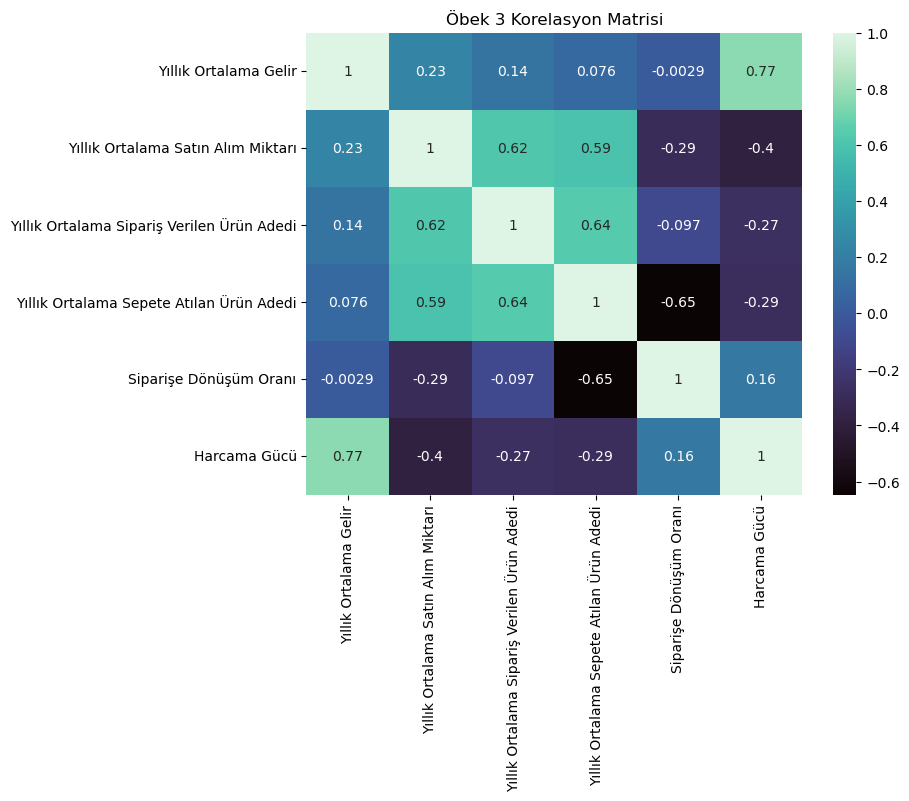

In [14]:
train_grouped_obek3['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 3 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek3['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 3 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek3['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 3 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek3['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 3 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek3['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 3 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek3['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 3 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek3[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 3 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 4 Eğitime Devam Durumu Dağılımı'}>

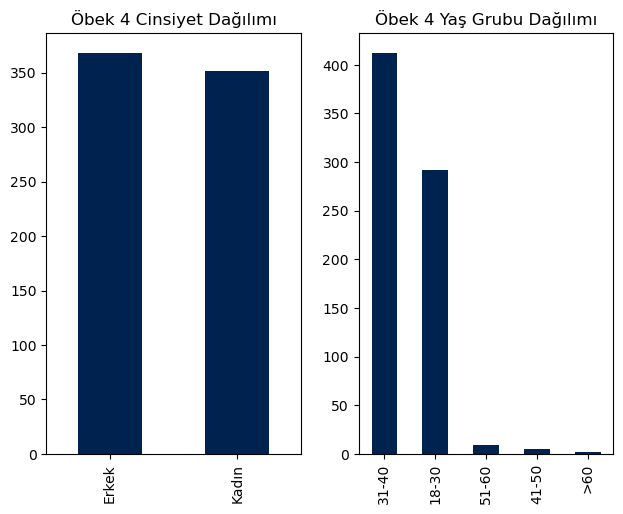

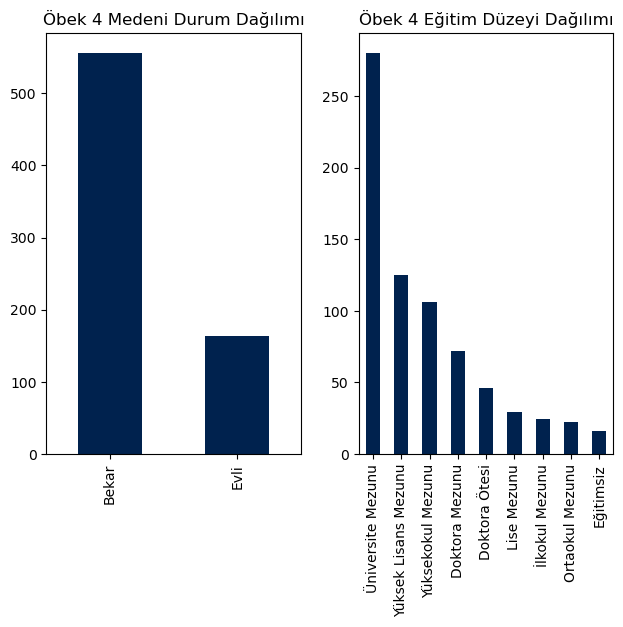

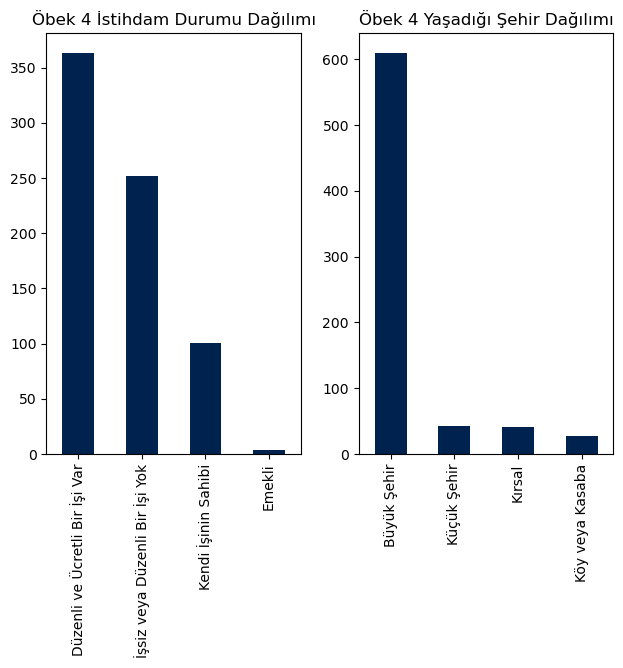

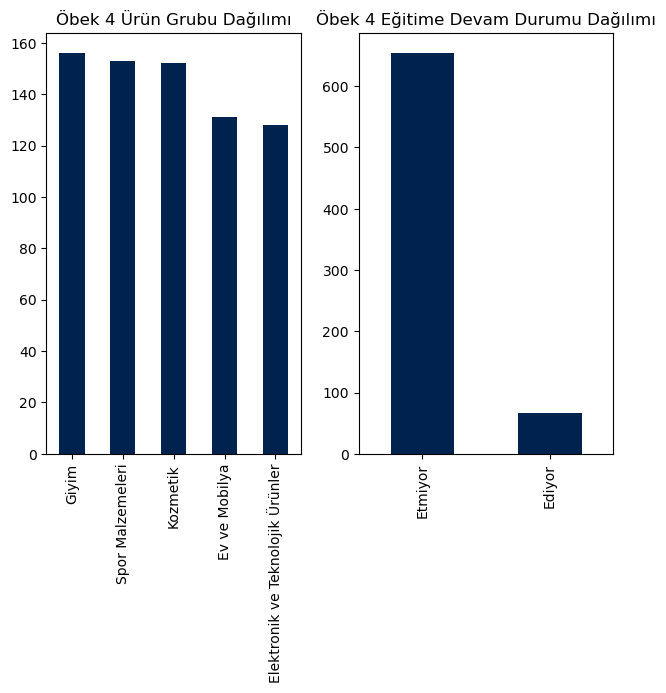

In [15]:
train_grouped_obek4= train[train['Öbek İsmi'] == 'obek_4']
train_grouped_obek4

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 4 Cinsiyet Dağılımı')
train_grouped_obek4['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 4 Yaş Grubu Dağılımı')
train_grouped_obek4['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 4 Medeni Durum Dağılımı')
train_grouped_obek4['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 4 Eğitim Düzeyi Dağılımı')
train_grouped_obek4['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 4 İstihdam Durumu Dağılımı')
train_grouped_obek4['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 4 Yaşadığı Şehir Dağılımı')
train_grouped_obek4['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 4 Ürün Grubu Dağılımı')
train_grouped_obek4['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 4 Eğitime Devam Durumu Dağılımı')
train_grouped_obek4['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

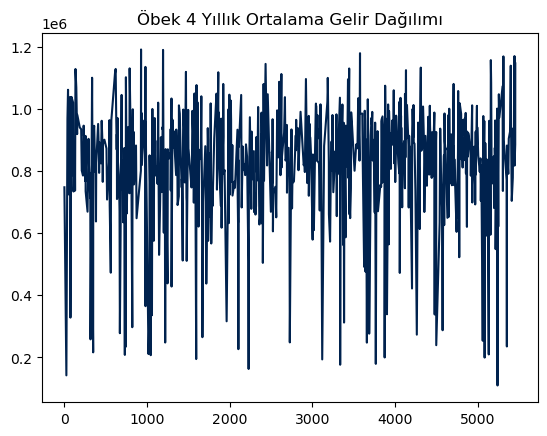

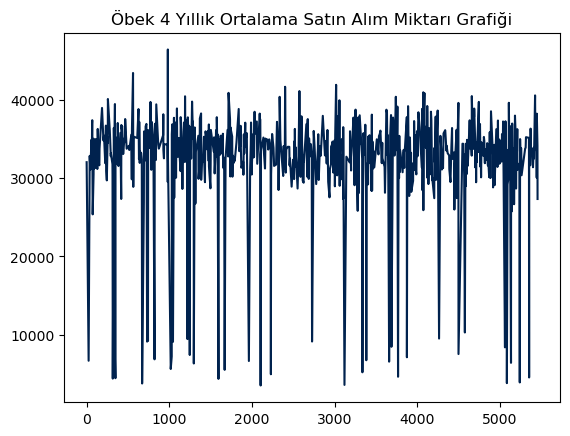

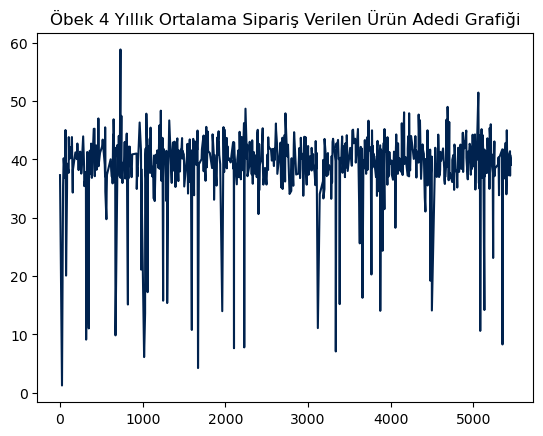

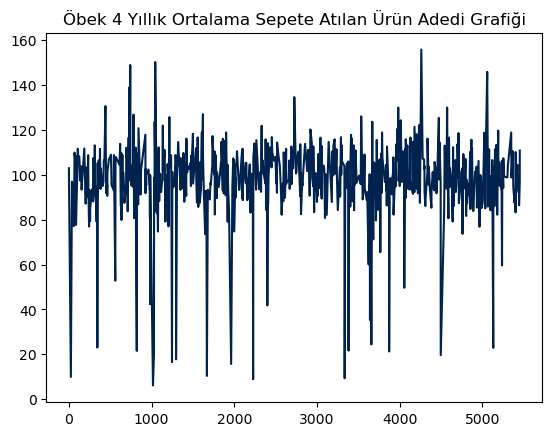

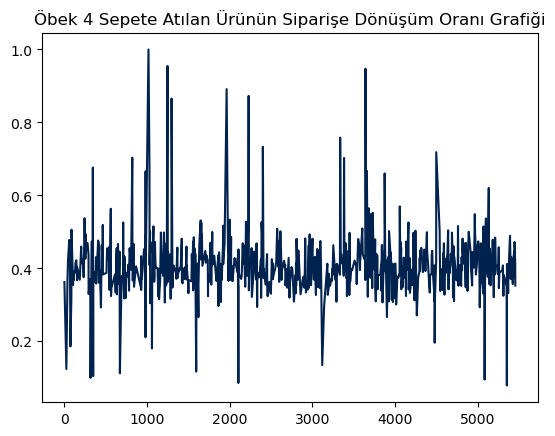

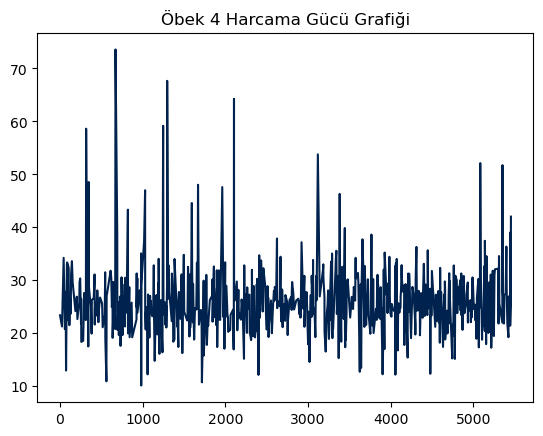

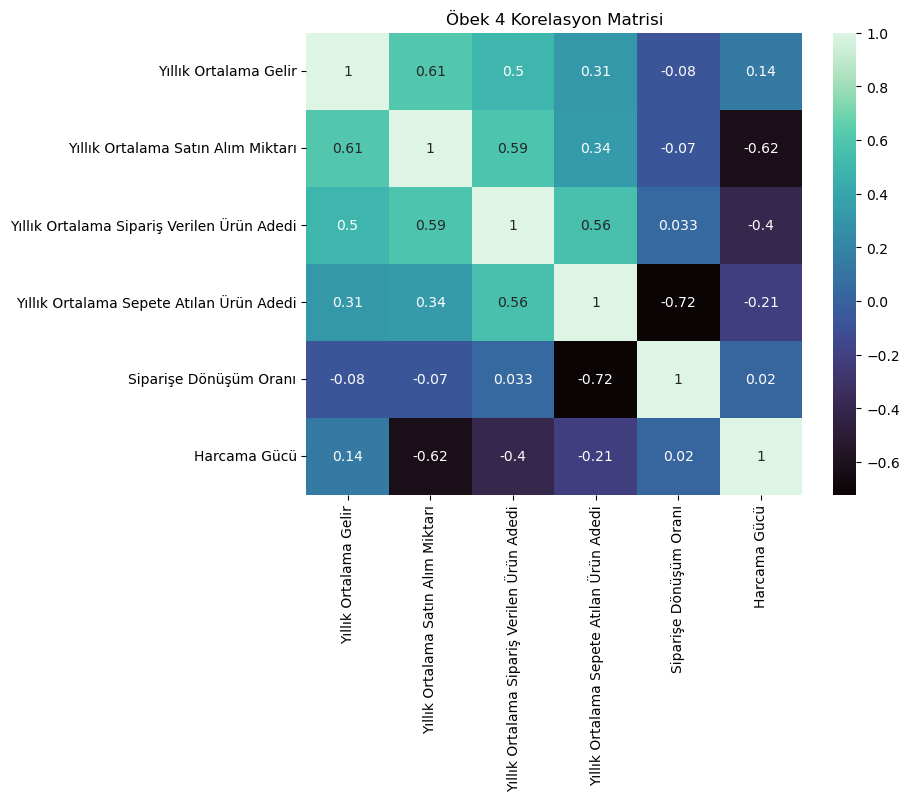

In [16]:
train_grouped_obek4['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 4 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek4['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 4 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek4['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 4 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek4['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 4 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek4['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 4 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek4['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 4 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek4[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 4 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 5 Eğitime Devam Durumu Dağılımı'}>

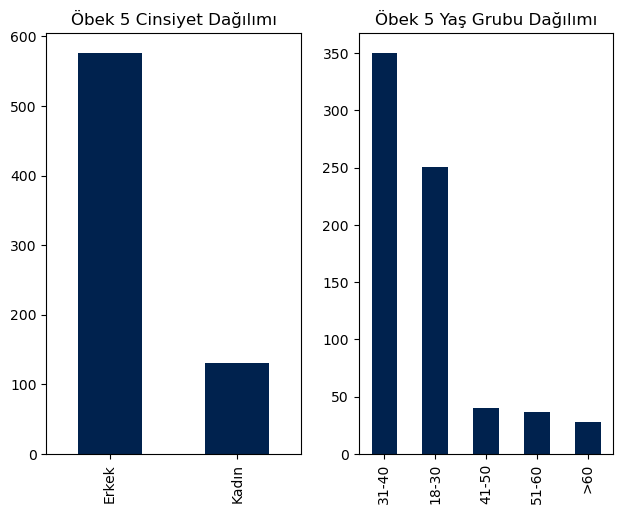

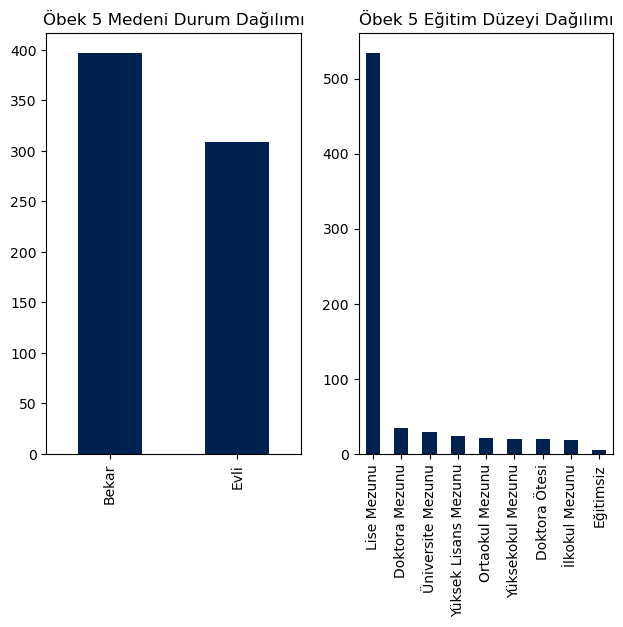

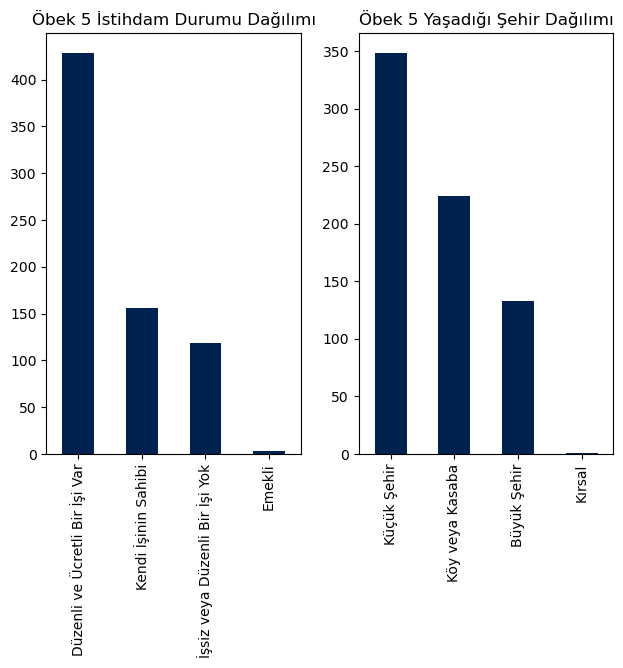

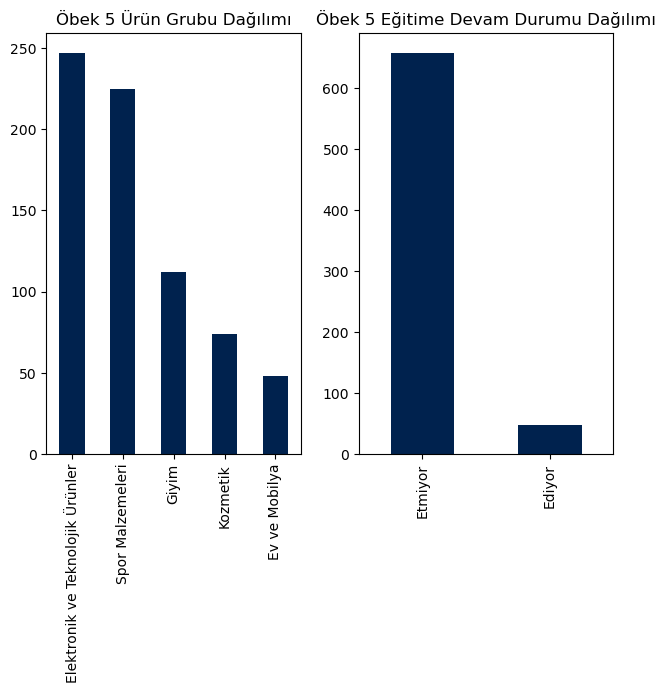

In [17]:
train_grouped_obek5= train[train['Öbek İsmi'] == 'obek_5']
train_grouped_obek5

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 5 Cinsiyet Dağılımı')
train_grouped_obek5['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 5 Yaş Grubu Dağılımı')
train_grouped_obek5['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 5 Medeni Durum Dağılımı')
train_grouped_obek5['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 5 Eğitim Düzeyi Dağılımı')
train_grouped_obek5['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 5 İstihdam Durumu Dağılımı')
train_grouped_obek5['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 5 Yaşadığı Şehir Dağılımı')
train_grouped_obek5['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 5 Ürün Grubu Dağılımı')
train_grouped_obek5['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 5 Eğitime Devam Durumu Dağılımı')
train_grouped_obek5['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

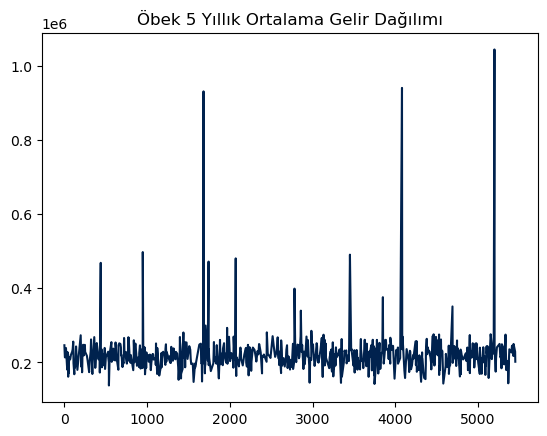

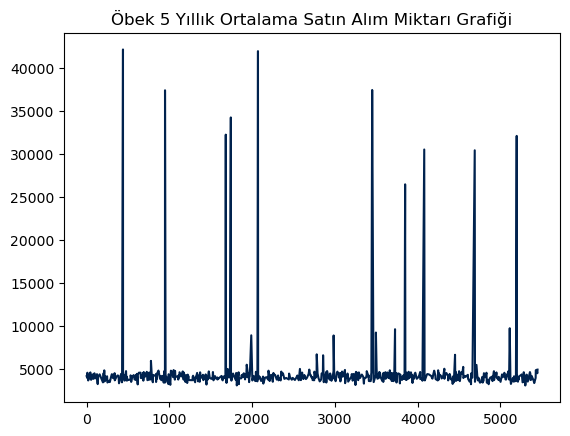

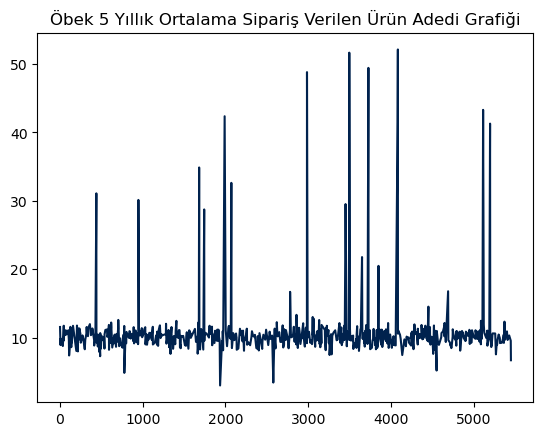

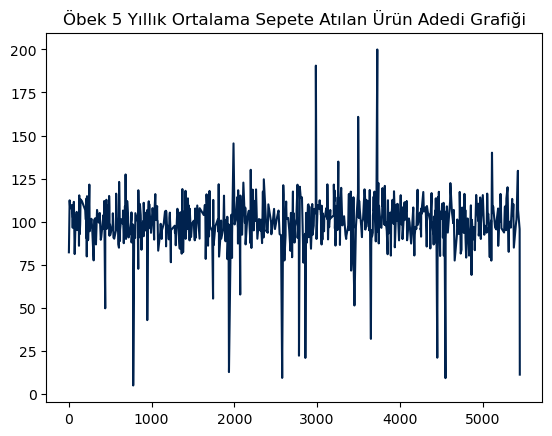

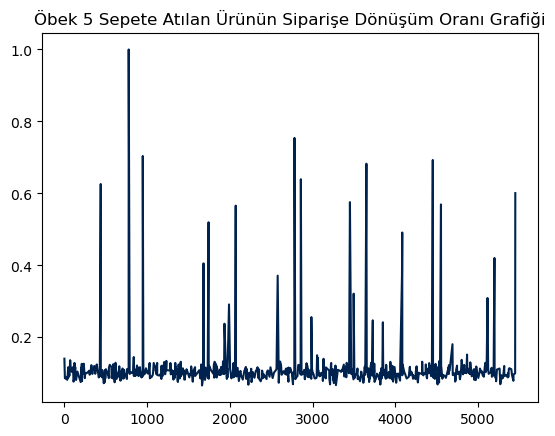

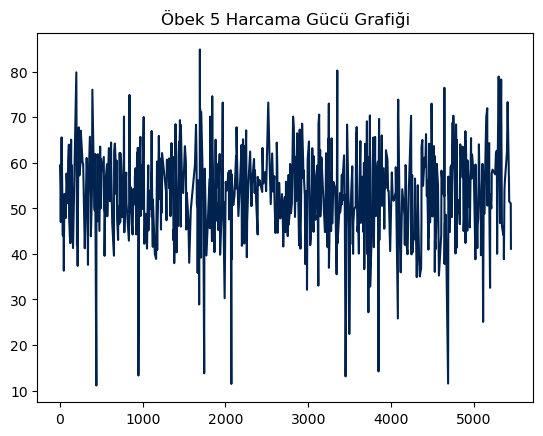

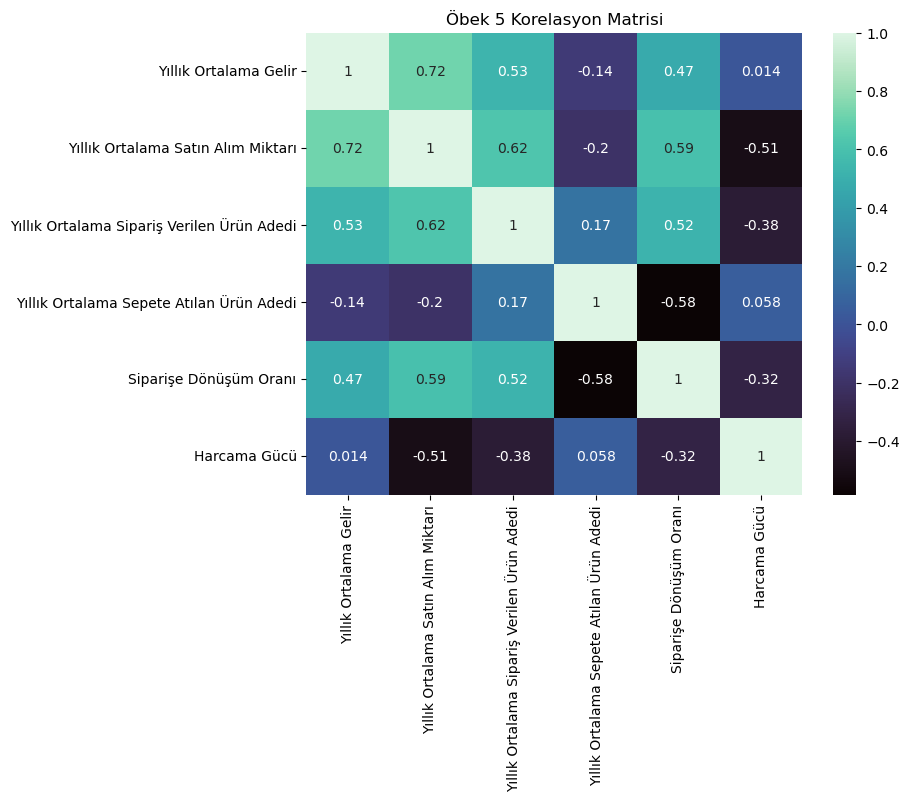

In [18]:
train_grouped_obek5['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 5 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek5['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 5 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek5['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 5 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek5['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 5 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek5['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 5 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek5['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 5 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek5[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 5 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 6 Eğitime Devam Durumu Dağılımı'}>

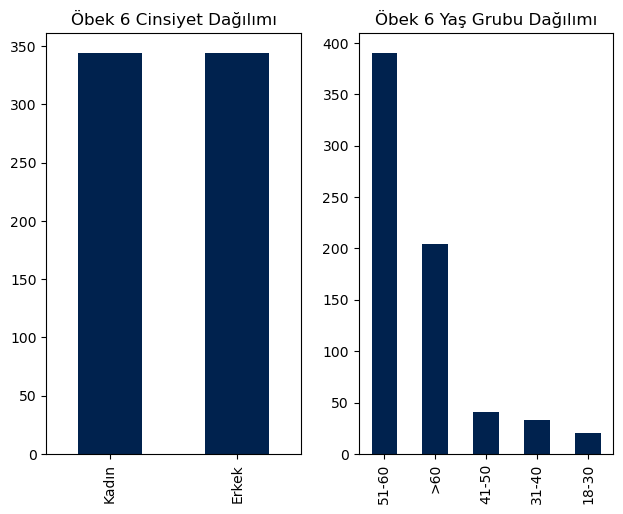

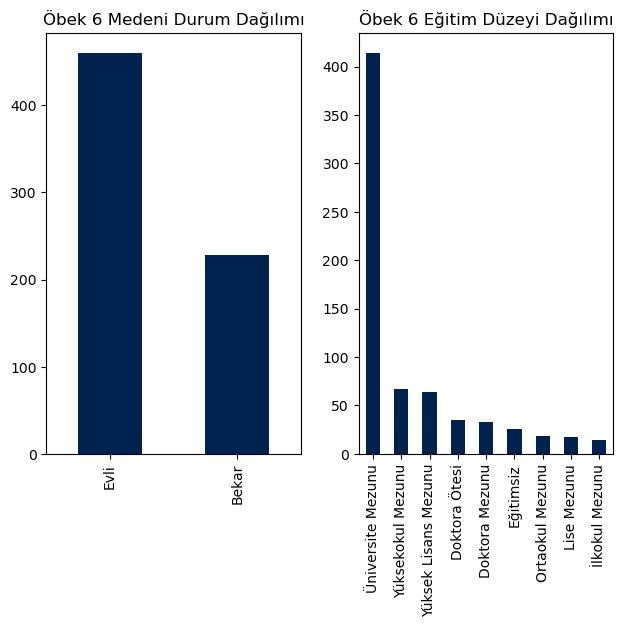

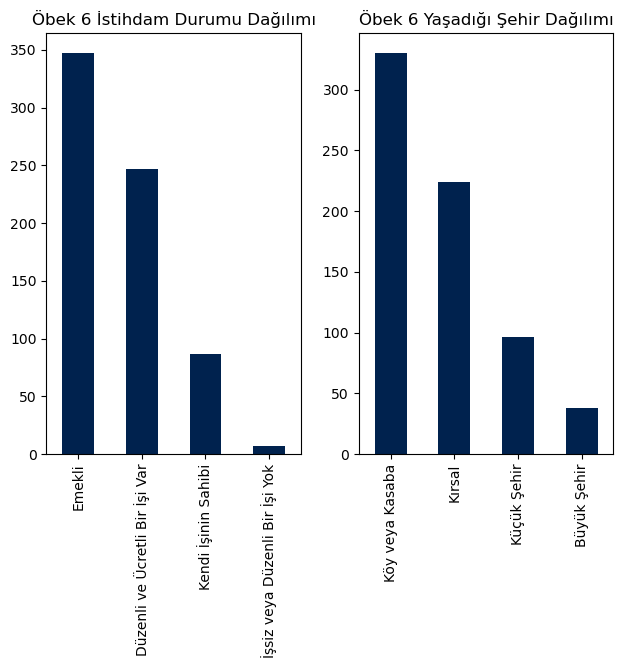

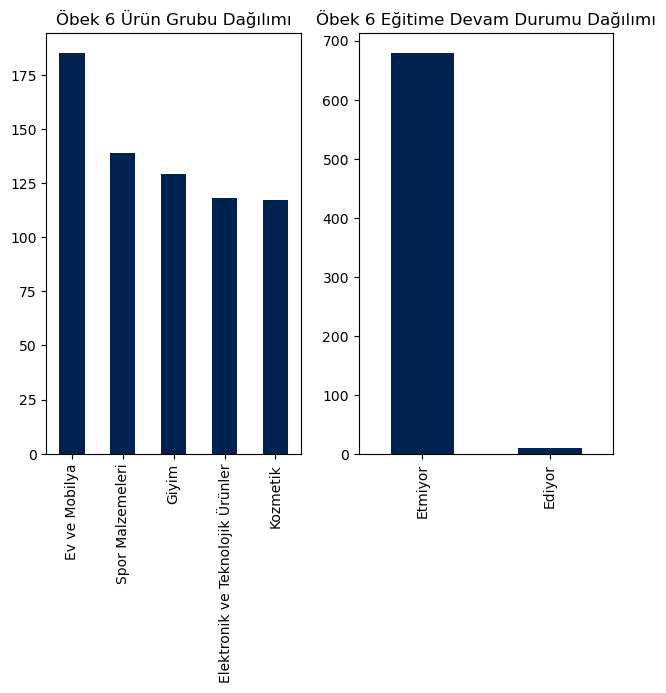

In [19]:
train_grouped_obek6= train[train['Öbek İsmi'] == 'obek_6']
train_grouped_obek6

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 6 Cinsiyet Dağılımı')
train_grouped_obek6['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 6 Yaş Grubu Dağılımı')
train_grouped_obek6['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 6 Medeni Durum Dağılımı')
train_grouped_obek6['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 6 Eğitim Düzeyi Dağılımı')
train_grouped_obek6['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 6 İstihdam Durumu Dağılımı')
train_grouped_obek6['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 6 Yaşadığı Şehir Dağılımı')
train_grouped_obek6['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 6 Ürün Grubu Dağılımı')
train_grouped_obek6['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 6 Eğitime Devam Durumu Dağılımı')
train_grouped_obek6['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

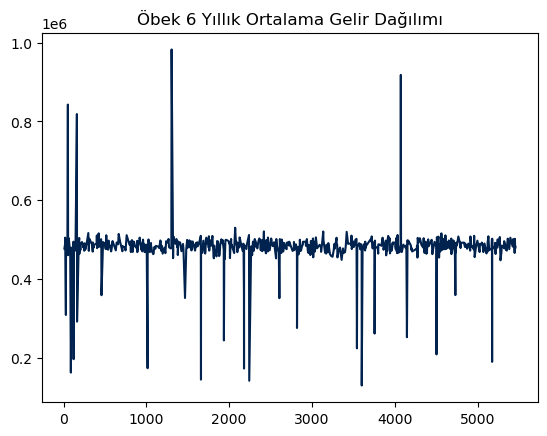

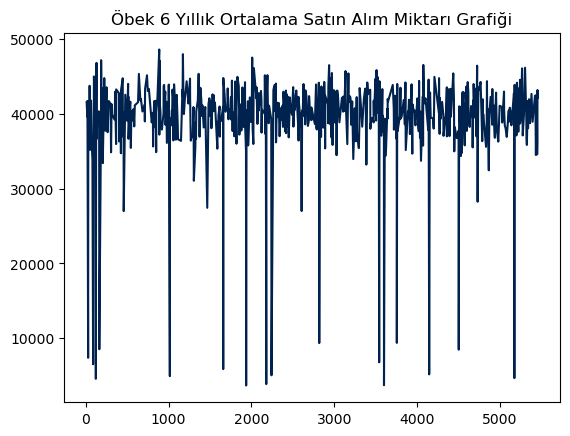

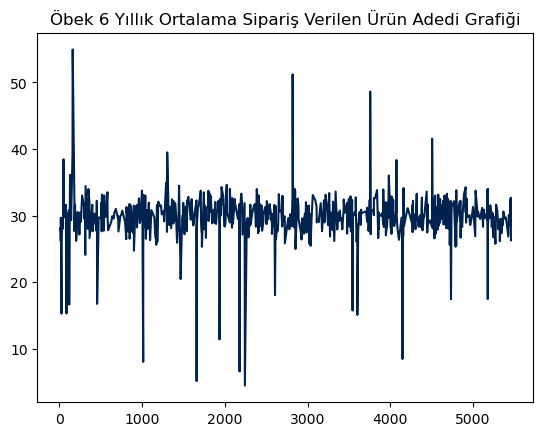

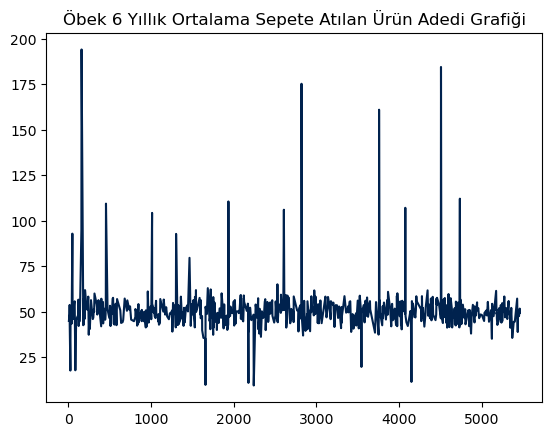

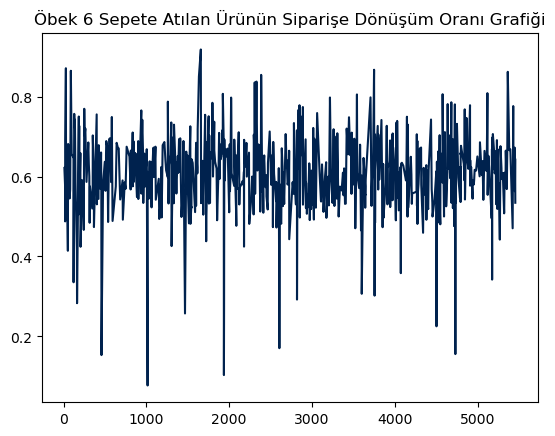

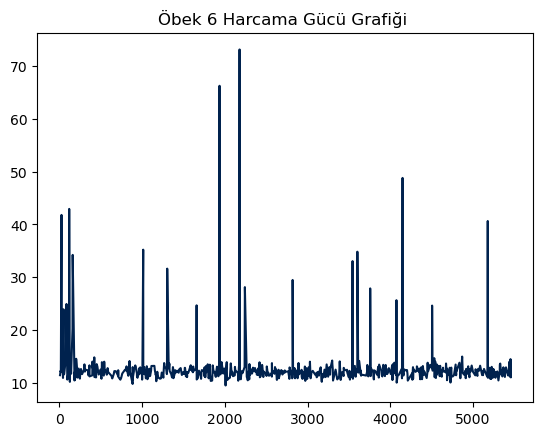

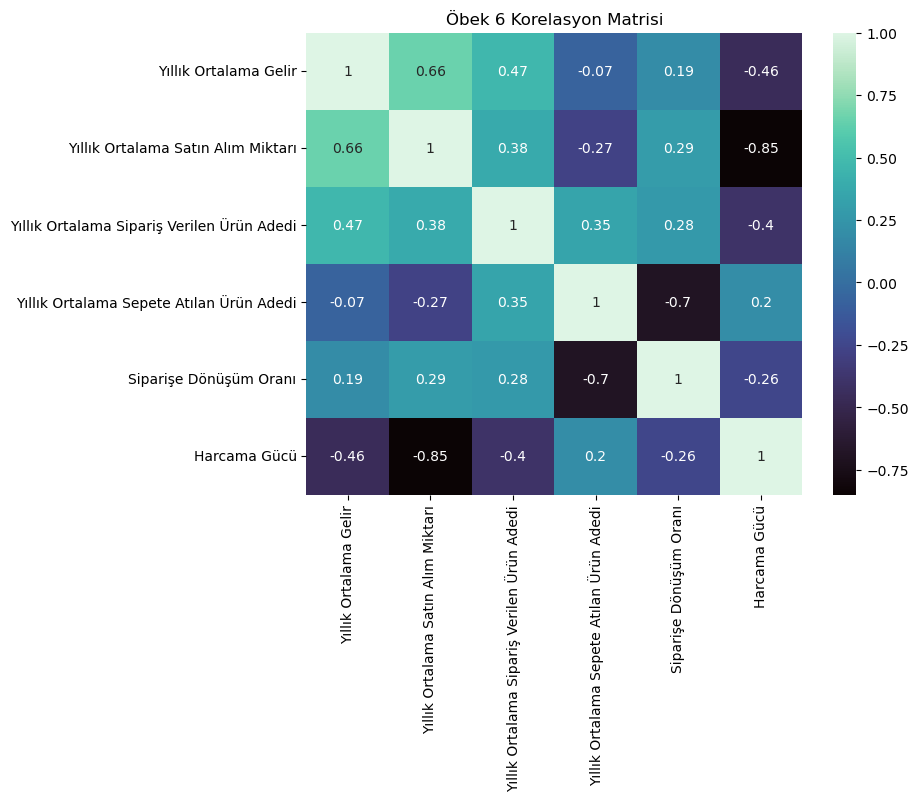

In [20]:
train_grouped_obek6['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 6 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek6['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 6 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek6['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 6 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek6['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 6 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek6['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 6 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek6['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 6 Harcama Gücü Grafiği ')
plt.show()


data_correlation_calc = train_grouped_obek6[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 6 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 7 Eğitime Devam Durumu Dağılımı'}>

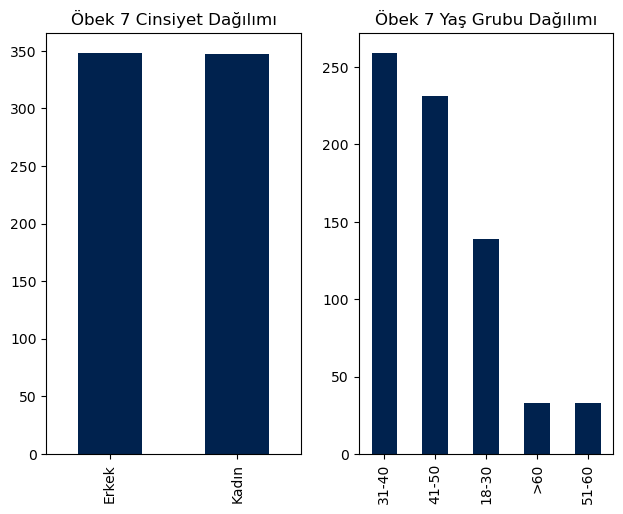

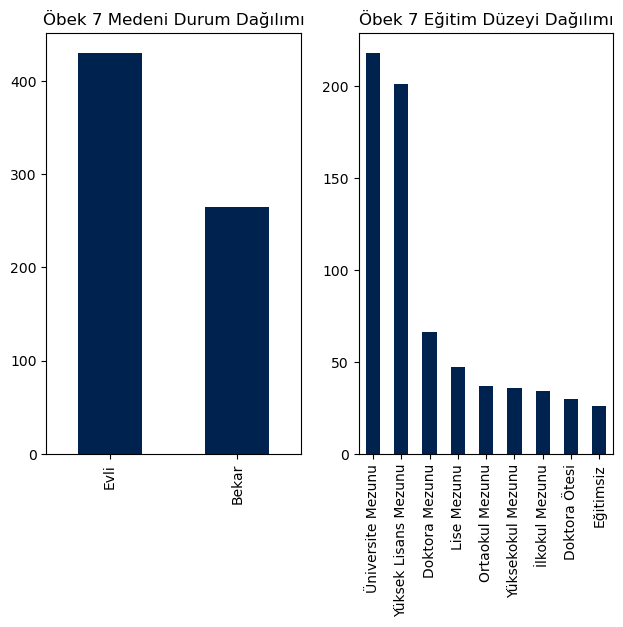

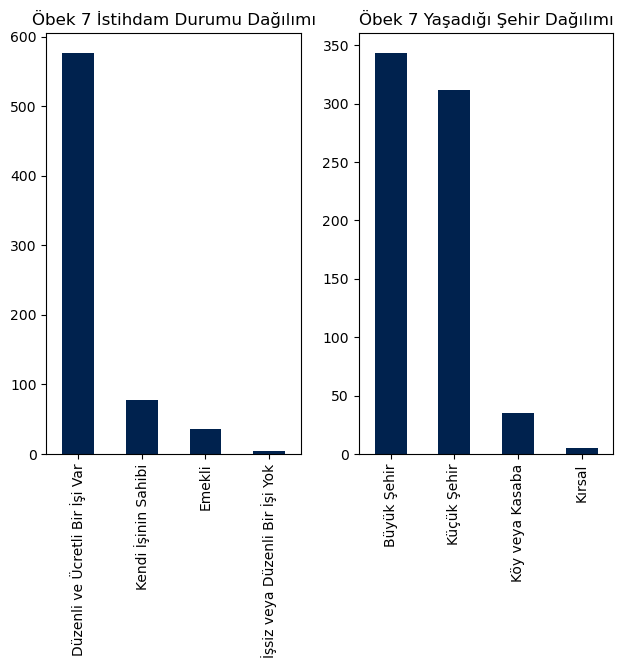

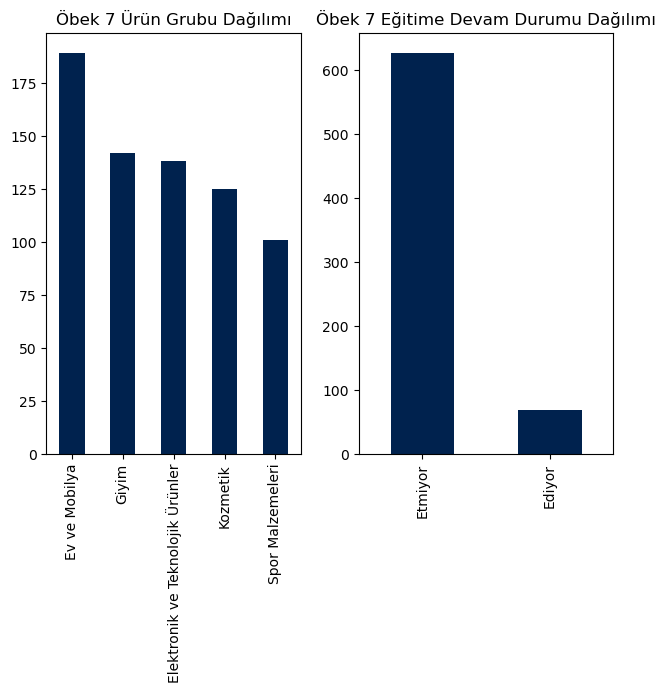

In [21]:
train_grouped_obek7= train[train['Öbek İsmi'] == 'obek_7']
train_grouped_obek7

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 7 Cinsiyet Dağılımı')
train_grouped_obek7['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 7 Yaş Grubu Dağılımı')
train_grouped_obek7['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 7 Medeni Durum Dağılımı')
train_grouped_obek7['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 7 Eğitim Düzeyi Dağılımı')
train_grouped_obek7['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 7 İstihdam Durumu Dağılımı')
train_grouped_obek7['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 7 Yaşadığı Şehir Dağılımı')
train_grouped_obek7['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 7 Ürün Grubu Dağılımı')
train_grouped_obek7['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 7 Eğitime Devam Durumu Dağılımı')
train_grouped_obek7['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

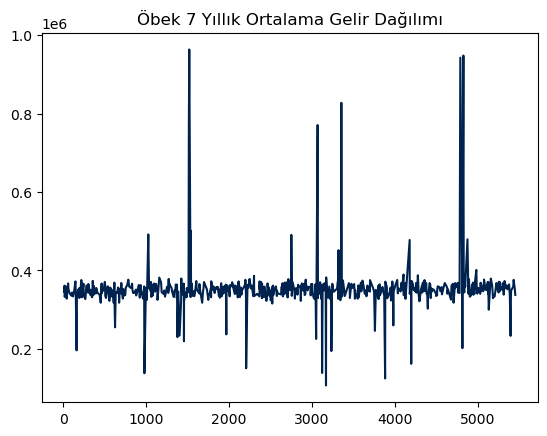

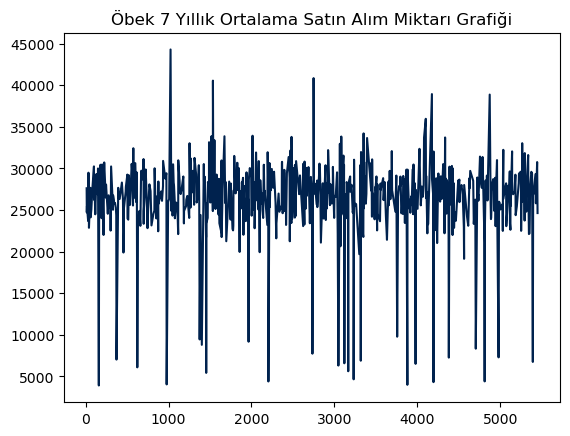

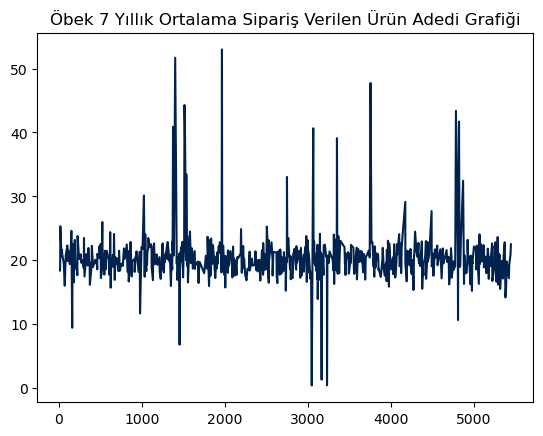

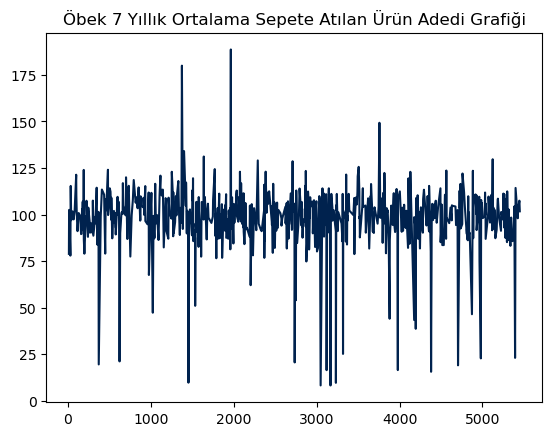

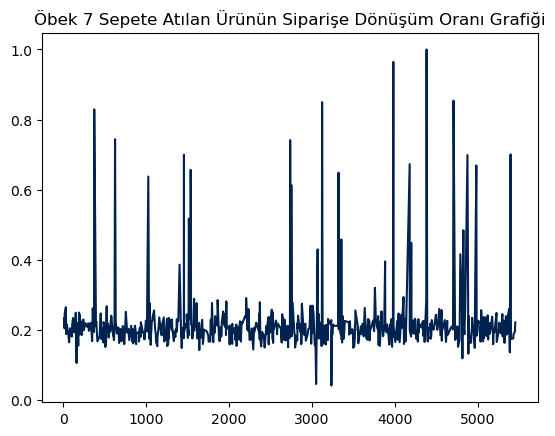

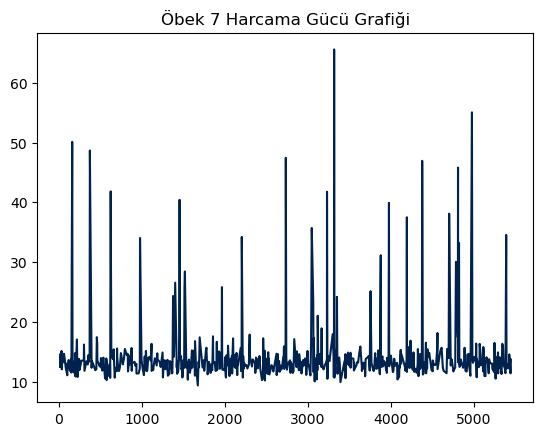

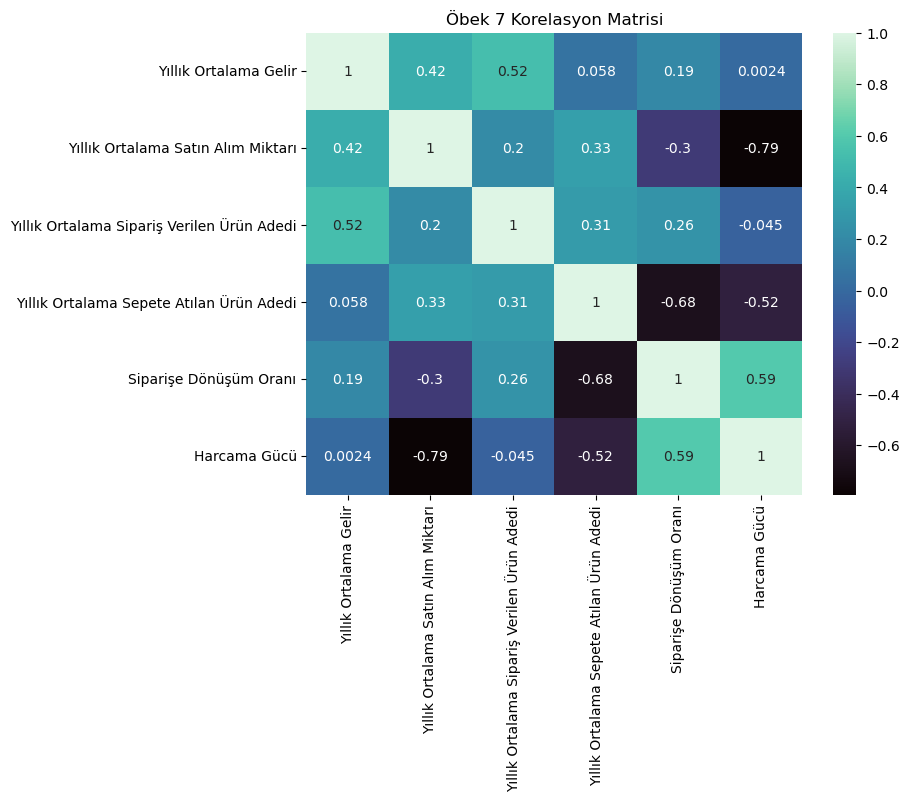

In [22]:
train_grouped_obek7['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 7 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek7['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 7 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek7['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 7 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek7['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 7 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek7['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 7 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek7['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 7 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek7[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 7 Korelasyon Matrisi')
plt.show()

<Axes: title={'center': 'Öbek 8 Eğitime Devam Durumu Dağılımı'}>

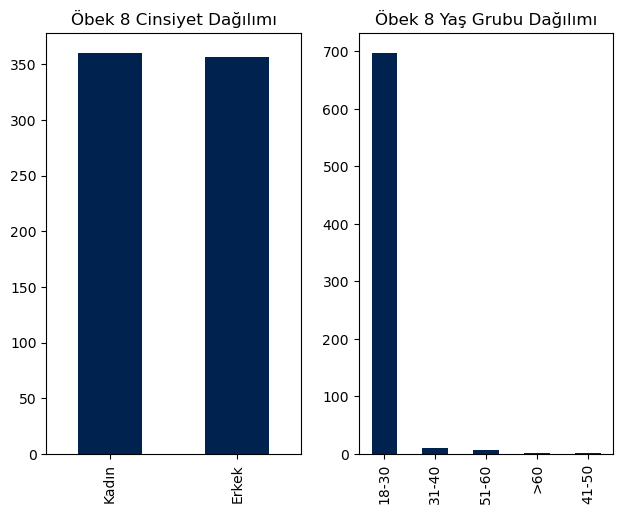

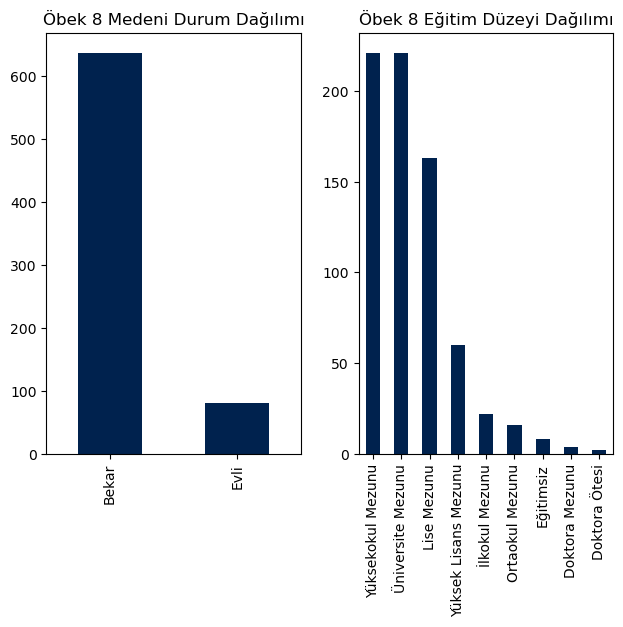

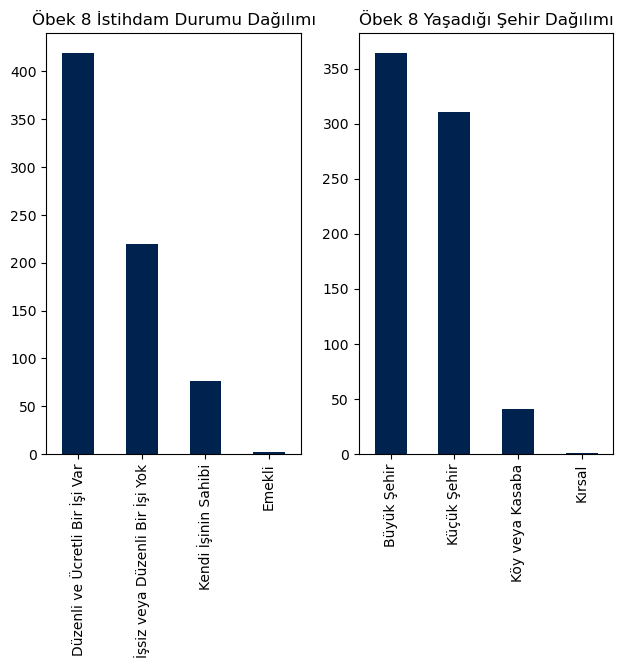

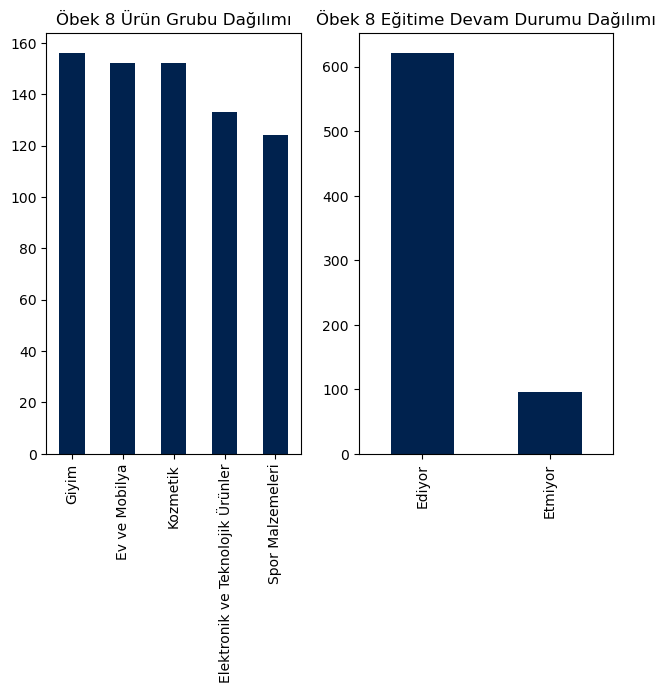

In [23]:
train_grouped_obek8= train[train['Öbek İsmi'] == 'obek_8']
train_grouped_obek8

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 8 Cinsiyet Dağılımı')
train_grouped_obek8['Cinsiyet'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 8 Yaş Grubu Dağılımı')
train_grouped_obek8['Yaş Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 8 Medeni Durum Dağılımı')
train_grouped_obek8['Medeni Durum'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 8 Eğitim Düzeyi Dağılımı')
train_grouped_obek8['Eğitim Düzeyi'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 8 İstihdam Durumu Dağılımı')
train_grouped_obek8['İstihdam Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 8 Yaşadığı Şehir Dağılımı')
train_grouped_obek8['Yaşadığı Şehir'].value_counts().plot(kind = 'bar', cmap = 'cividis')

fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Öbek 8 Ürün Grubu Dağılımı')
train_grouped_obek8['En Çok İlgilendiği Ürün Grubu'].value_counts().plot(kind = 'bar', cmap = 'cividis')
plt.subplot(1, 2, 2)
plt.title('Öbek 8 Eğitime Devam Durumu Dağılımı')
train_grouped_obek8['Eğitime Devam Etme Durumu'].value_counts().plot(kind = 'bar', cmap = 'cividis')

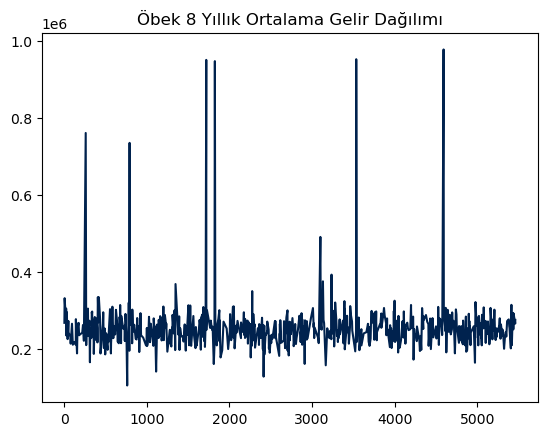

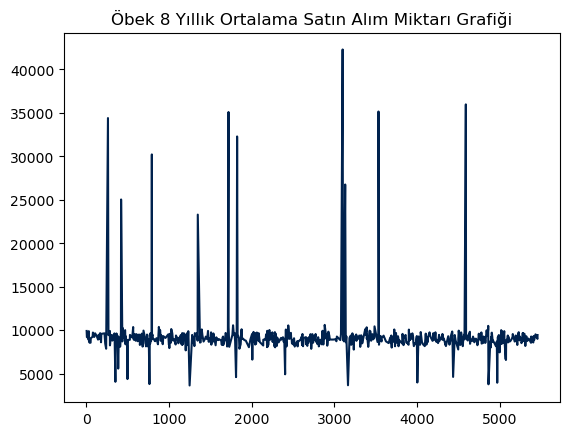

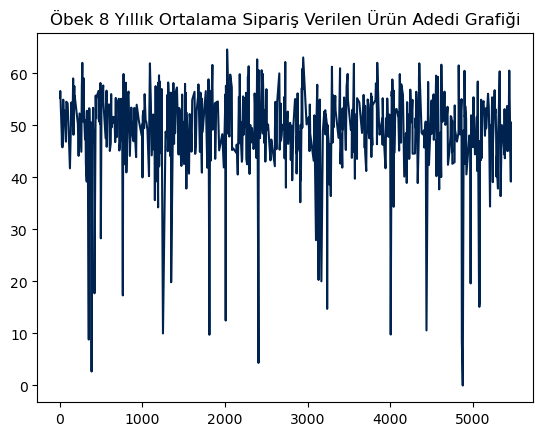

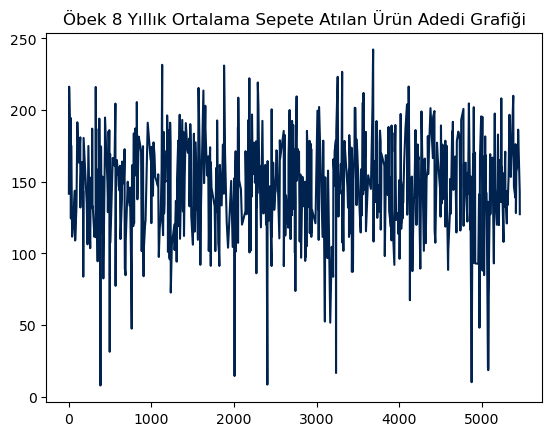

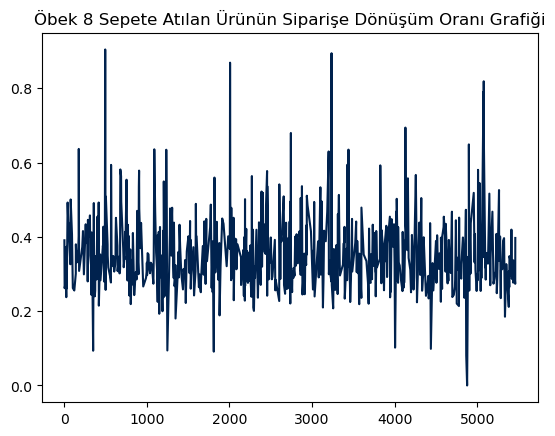

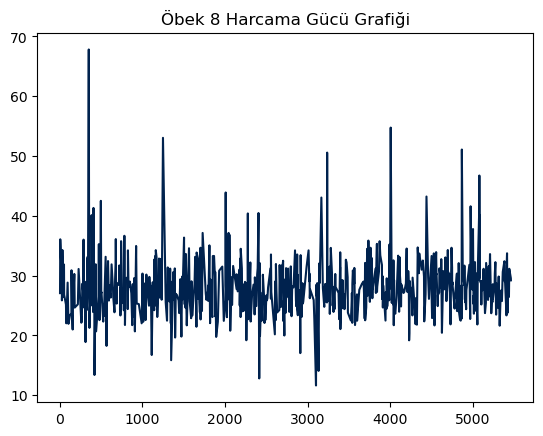

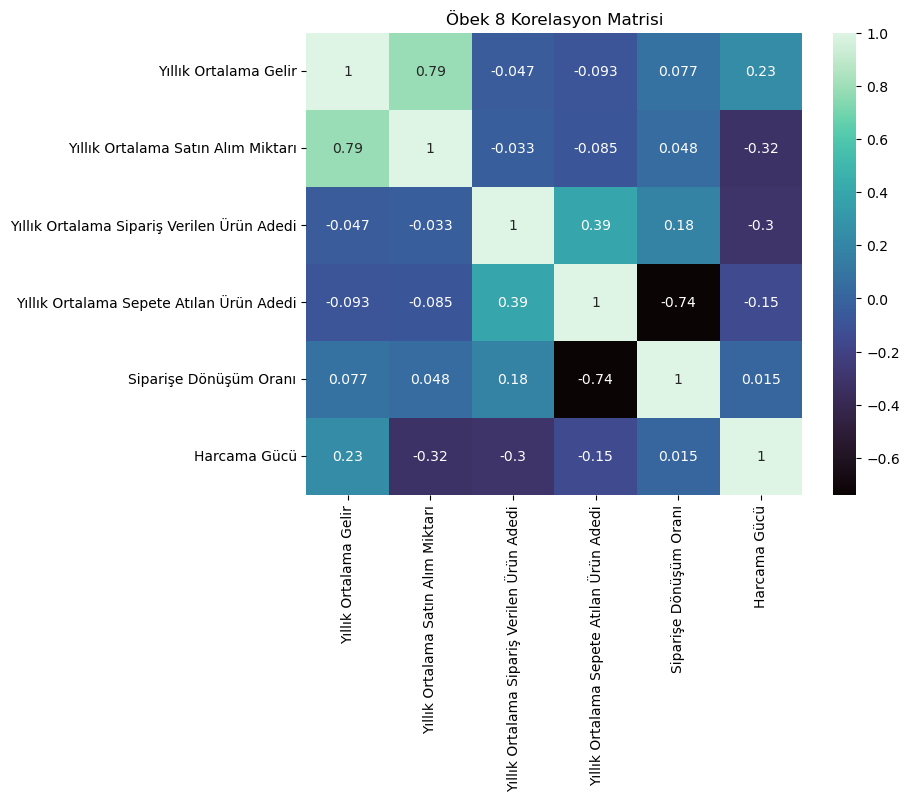

In [24]:
train_grouped_obek8['Yıllık Ortalama Gelir'].plot(cmap = 'cividis')
plt.title('Öbek 8 Yıllık Ortalama Gelir Dağılımı')
plt.show()

train_grouped_obek8['Yıllık Ortalama Satın Alım Miktarı'].plot(cmap = 'cividis')
plt.title('Öbek 8 Yıllık Ortalama Satın Alım Miktarı Grafiği')
plt.show()

train_grouped_obek8['Yıllık Ortalama Sipariş Verilen Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 8 Yıllık Ortalama Sipariş Verilen Ürün Adedi Grafiği')
plt.show()

train_grouped_obek8['Yıllık Ortalama Sepete Atılan Ürün Adedi'].plot(cmap = 'cividis')
plt.title('Öbek 8 Yıllık Ortalama Sepete Atılan Ürün Adedi Grafiği')
plt.show()

train_grouped_obek8['Siparişe Dönüşüm Oranı'].plot(cmap = 'cividis')
plt.title('Öbek 8 Sepete Atılan Ürünün Siparişe Dönüşüm Oranı Grafiği')
plt.show()

train_grouped_obek8['Harcama Gücü'].plot(cmap = 'cividis')
plt.title('Öbek 8 Harcama Gücü Grafiği')
plt.show()


data_correlation_calc = train_grouped_obek8[['Yıllık Ortalama Gelir', 'Yıllık Ortalama Satın Alım Miktarı', 'Yıllık Ortalama Sipariş Verilen Ürün Adedi', 'Yıllık Ortalama Sepete Atılan Ürün Adedi', 'Siparişe Dönüşüm Oranı', 'Harcama Gücü']]
corr_matrix = data_correlation_calc.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako')
plt.title('Öbek 8 Korelasyon Matrisi')
plt.show()

In [25]:
yeni_cat = ['Yıllık Ortalama Gelir','Yıllık Ortalama Satın Alım Miktarı','Yıllık Ortalama Sepete Atılan Ürün Adedi']
yeni_cat_adi = ['Gelir Grubu','Sadakat(Sipariş)','Aktivite(Sepet)']
for i, yenicat in enumerate(yeni_cat):
    adet_ortalama = train[yenicat].mean()
    adet_std = train[yenicat].std()

    alt_sınır_adet = adet_ortalama - adet_std
    üst_sınır_adet = adet_ortalama + adet_std

    def adet_kategorize(adet):
        if adet <= alt_sınır_adet:
            return 'Düşük'
        elif adet <= üst_sınır_adet:
            return 'Orta'
        else:
            return 'Yüksek'

    train[yeni_cat_adi[i]] = train[yenicat].apply(adet_kategorize) 
    test[yeni_cat_adi[i]] = test[yenicat].apply(adet_kategorize) 


In [26]:
num_cols = ['Yıllık Ortalama Gelir','Yıllık Ortalama Satın Alım Miktarı','Yıllık Ortalama Sipariş Verilen Ürün Adedi','Yıllık Ortalama Sepete Atılan Ürün Adedi']
cat_cols = [col for col in train.columns if train[col].dtypes == "O"]
cat_cols.remove("Öbek İsmi")
tag = "Öbek İsmi"

In [27]:
color_palette = px.colors.qualitative.T10

trace1 = go.Pie(values = train['Öbek İsmi'].value_counts(),labels = train['Öbek İsmi'].unique(),textinfo='percent',insidetextorientation='radial',legendgroup='show')
trace2 = go.Histogram(x = train['Öbek İsmi'],marker=dict(color=color_palette))
#data = [trace1,trace2]
#layout = go.Layout(title = 'Customer Segmentation')
#fig = go.Figure(data = data, layout = layout)
fig = make_subplots(rows=1, cols=2,subplot_titles=('Pie chart','Bar chart'),specs=[[{"type": "pie"}, {"type": "histogram"}]])  

                          
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig['layout'].update(title='Customer Segmentation',)
fig.show();

In [28]:
for col in train[cat_cols].columns:
    
    fig = px.histogram(train,
                   x=col,
                   color="Öbek İsmi",
                   barmode="group",
                   title=("{} ve Öbek İsmi").format(col),
                   color_discrete_sequence=px.colors.qualitative.T10)  # İstediğiniz renk şemasını seçebilirsiniz
    fig.show()

In [29]:
for col in num_cols:
    # Upper fence hesaplaması
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    if col =="Yıllık Ortalama Gelir":
        outliers = train[col][(train[col] < lower_fence) | (train[col] > upper_fence)]
        outliers_indices = train[col][(train[col] < lower_fence) | (train[col] > upper_fence)].dropna(how='all').index
    
    upper_fence_count = len(train[train[col] > upper_fence])

    data = [go.Box(x=train[col]),]
    layout = go.Layout(title= col)
    layout = go.Layout(title=col + f"<br>({upper_fence_count} adet anomali gözlem)")

    fig = go.Figure(data = data, layout = layout)
    fig.show()

Yıllık Ortalama Gelir
count    5.460000e+03
mean     3.635711e+05
std      2.197144e+05
min      4.392299e+04
25%      2.156934e+05
50%      2.869254e+05
75%      4.681882e+05
max      1.192437e+06
Name: Yıllık Ortalama Gelir, dtype: float64



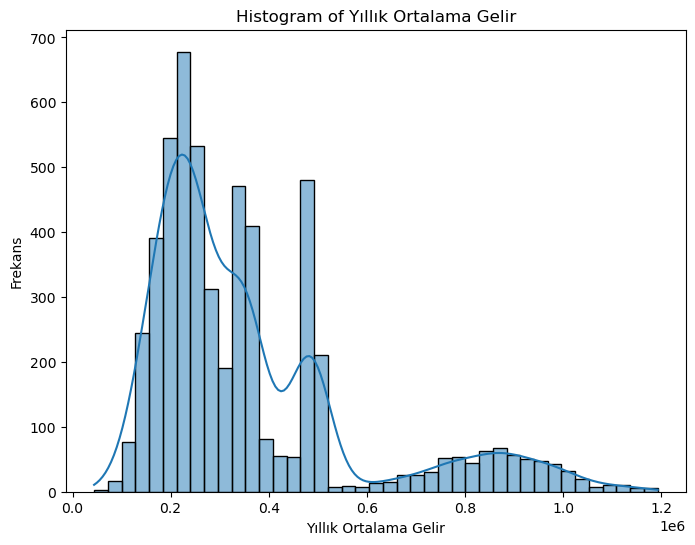

Yıllık Ortalama Satın Alım Miktarı
count     5460.000000
mean     16616.612217
std      14099.171704
min       2859.254000
25%       4931.859057
50%       8426.818967
75%      30579.244695
max      48605.594415
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64



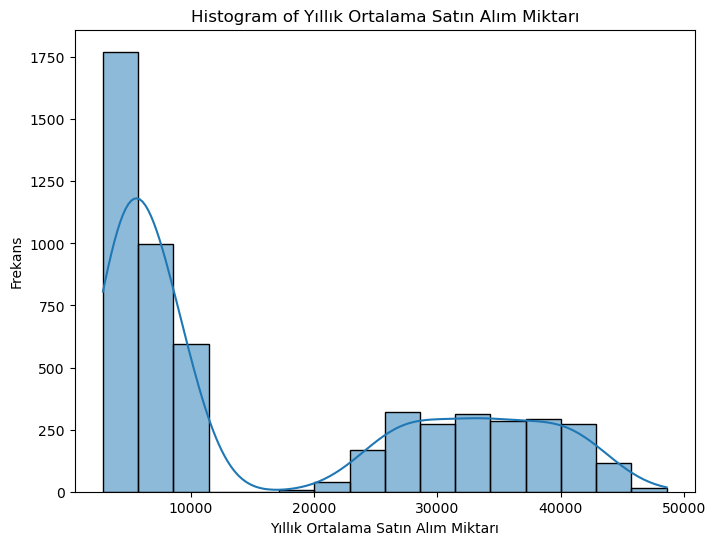

Yıllık Ortalama Sipariş Verilen Ürün Adedi
count    5460.000000
mean       24.040884
std        14.945655
min         0.000000
25%        11.550502
50%        20.095924
75%        35.918161
max        64.616196
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: float64



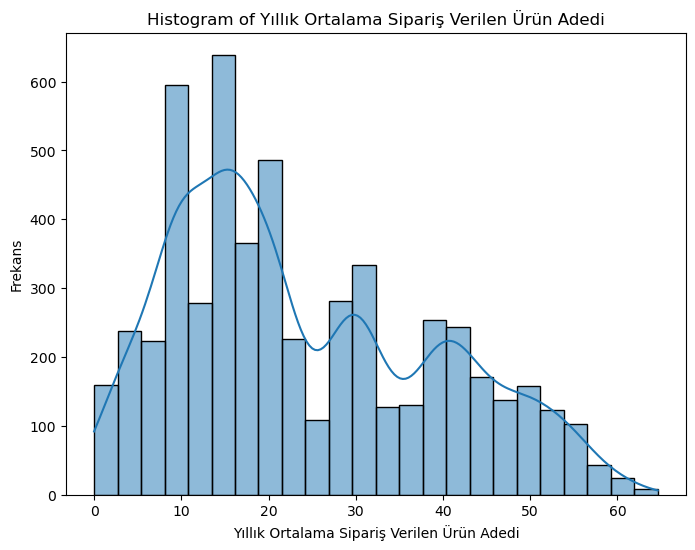

Yıllık Ortalama Sepete Atılan Ürün Adedi
count    5460.000000
mean       73.445693
std        47.214184
min         3.977559
25%        25.009168
50%        82.485579
75%       104.473291
max       242.308441
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: float64



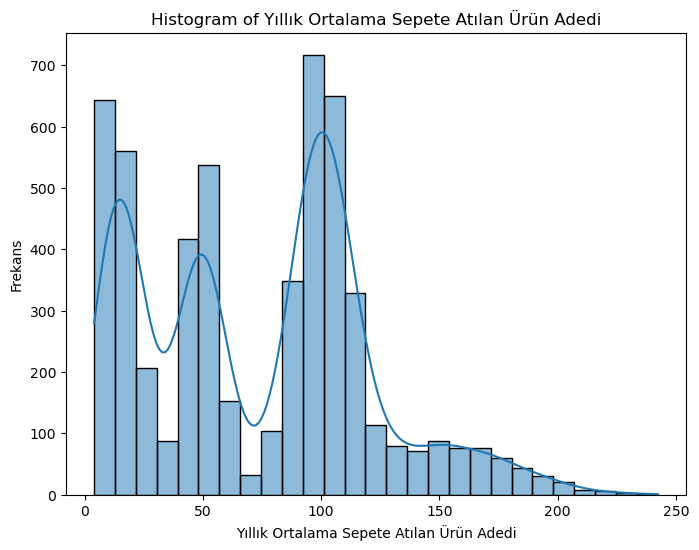

In [30]:
for col in num_cols:
    print(col)
    print(train[col].describe().T)
    print()

    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], kde=True)
    plt.title('Histogram of '+col)
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()

<Axes: >

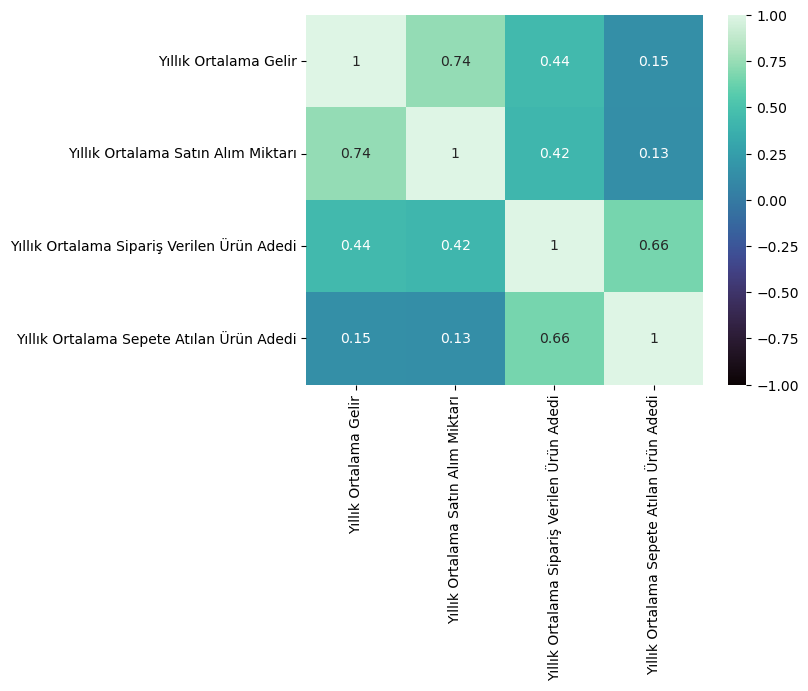

In [31]:
sns.heatmap(train[num_cols].corr(),annot=True,cmap='mako',vmin=-1,vmax=1)

In [32]:
train['Eğitim Düzeyi'].unique()

array(['Yüksek Lisans Mezunu', 'Lise Mezunu', 'Ortaokul Mezunu',
       'Yüksekokul Mezunu', 'Üniversite Mezunu', 'Doktora Mezunu',
       'İlkokul Mezunu', 'Doktora Ötesi', 'Eğitimsiz'], dtype=object)

In [33]:
# Label Encoder oluşturuluyor ve 'Eğitim Düzeyi' sütunu dönüştürülüyor
label_encoder = LabelEncoder()
train['Eğitim Düzeyi Encoded'] = label_encoder.fit_transform(train['Eğitim Düzeyi'])

# Eğitim seviyeleri ile encoding değerleri eşleştiriliyor
eğitim_mapping = {
    'Eğitimsiz': 0,
    'İlkokul Mezunu': 1,
    'Ortaokul Mezunu': 2,
    'Lise Mezunu': 3,
    'Yüksekokul Mezunu': 4,
    'Üniversite Mezunu': 5,
    'Yüksek Lisans Mezunu': 6,
    'Doktora Mezunu': 7,
    'Doktora Ötesi': 8
}

# Encoding değerlerini kullanarak 'Eğitim Düzeyi' sütununu güncelleme
train.drop(columns="Eğitim Düzeyi Encoded", inplace=True)
train['Eğitim Düzeyi'] = train['Eğitim Düzeyi'].map(eğitim_mapping)

yeni_cat_columns = train[yeni_cat_adi]
encoder = OrdinalEncoder()

encoded_data = encoder.fit_transform(yeni_cat_columns)

# Dönüştürülen verileri DataFrame'e geri dönüştürün
encoded_df = pd.DataFrame(encoded_data, columns=yeni_cat_adi)
train.drop(columns={'Gelir Grubu','Sadakat(Sipariş)','Aktivite(Sepet)'},inplace=True)
train = pd.concat([train, encoded_df], axis=1)
train[['Gelir Grubu', 'Sadakat(Sipariş)', 'Aktivite(Sepet)']] = train[['Gelir Grubu', 'Sadakat(Sipariş)', 'Aktivite(Sepet)']].astype(int)


In [34]:
# Label Encoder oluşturuluyor ve 'Eğitim Düzeyi' sütunu dönüştürülüyor
label_encoder = LabelEncoder()
test['Eğitim Düzeyi Encoded'] = label_encoder.fit_transform(test['Eğitim Düzeyi'])

# Eğitim seviyeleri ile encoding değerleri eşleştiriliyor
eğitim_mapping = {
    'Eğitimsiz': 0,
    'İlkokul Mezunu': 1,
    'Ortaokul Mezunu': 2,
    'Lise Mezunu': 3,
    'Yüksekokul Mezunu': 4,
    'Üniversite Mezunu': 5,
    'Yüksek Lisans Mezunu': 6,
    'Doktora Mezunu': 7,
    'Doktora Ötesi': 8
}

# Encoding değerlerini kullanarak 'Eğitim Düzeyi' sütununu güncelleme
test.drop(columns="Eğitim Düzeyi Encoded", inplace=True)
test['Eğitim Düzeyi'] = test['Eğitim Düzeyi'].map(eğitim_mapping)

yeni_cat_columns = test[yeni_cat_adi]
encoder = OrdinalEncoder()

encoded_data = encoder.fit_transform(yeni_cat_columns)

# Dönüştürülen verileri DataFrame'e geri dönüştürün
encoded_df = pd.DataFrame(encoded_data, columns=yeni_cat_adi)
test.drop(columns={'Gelir Grubu','Sadakat(Sipariş)','Aktivite(Sepet)'},inplace=True)
test = pd.concat([test, encoded_df], axis=1)


In [35]:
train = pd.get_dummies(train, columns=['Cinsiyet','Yaş Grubu','Medeni Durum','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'],drop_first=True)
train = train.replace({True: 1, False: 0})

test = pd.get_dummies(test, columns=['Cinsiyet','Yaş Grubu','Medeni Durum','Yaşadığı Şehir', 'İstihdam Durumu','Eğitime Devam Etme Durumu', 'En Çok İlgilendiği Ürün Grubu'],drop_first=True)
test = test.replace({True: 1, False: 0})

In [36]:
#MinMaxScaler sürekli sayısal değerleri ölçeklendirme
scaler = MinMaxScaler()

float64_cols = train.select_dtypes(include=['float64'])
train[float64_cols.columns] = scaler.fit_transform(float64_cols)

float64_cols = test.select_dtypes(include=['float64'])
test[float64_cols.columns] = scaler.fit_transform(float64_cols)

train

Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0                 6               0.613265   
1                 3               0.176206   
2                 3               0.195609   
3                 3               0.247101   
4                 2               0.307797   
...             ...                    ...   
5455              5               0.377994   
5456              8               0.381301   
5457              1               0.231186   
5458              4               0.193886   
5459              4               0.202202   

      Yıllık Ortalama Satın Alım Miktarı  \
0                               0.637245   
1                               0.028122   
2                               0.154441   
3                               0.077788   
4                               0.109898   
...                                  ...   
5455                            0.881449   
5456                            0.857965   
5457                            0.039263   
5458                            0.134588   
5459                            0.144195   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Öbek İsmi  \
0                                       0.577419    obek_4   
1                                       0.178823    obek_5   
2                                       0.856646    obek_8   
3                                       0.238597    obek_3   
4                                       0.227340    obek_3   
...                                          ...       ...   
5455                                    0.485270    obek_6   
5456                                    0.406843    obek_6   
5457                                    0.079808    obek_1   
5458                                    0.606743    obek_8   
5459                                    0.782376    obek_8   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Siparişe Dönüşüm Oranı  \
0                                     0.415218                0.362461   
1                                     0.328109                0.140611   
2                                     0.577700                0.390743   
3                                     0.055049                0.901730   
4                                     0.069202                0.717612   
...                                        ...                     ...   
5455                                  0.199818                0.607675   
5456                                  0.189707                0.534424   
5457                                  0.023328                0.540704   
5458                                  0.584499                0.273625   
5459                                  0.517565                0.397035   

      Harcama Gücü  Gelir Grubu  Sadakat(Sipariş)  Aktivite(Sepet)  \
0         0.189342            2                 1                1   
1         0.600451            1                 0                1   
2         0.231412            1                 0                2   
3         0.505240            1                 0                0   
4         0.497576            1                 0                0   
...            ...          ...               ...              ...   
5455      0.048961            1                 1                1   
5456      0.053213            1                 1                1   
5457      0.680994            1                 0                0   
5458      0.260010            1                 0                2   
5459      0.255853            1                 0                2   

      Cinsiyet_Kadın  Yaş Grubu_31-40  Yaş Grubu_41-50  Yaş Grubu_51-60  \
0                  1                1                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                1   
4                  0                1                0                0   

In [37]:
train

Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0                 6               0.613265   
1                 3               0.176206   
2                 3               0.195609   
3                 3               0.247101   
4                 2               0.307797   
...             ...                    ...   
5455              5               0.377994   
5456              8               0.381301   
5457              1               0.231186   
5458              4               0.193886   
5459              4               0.202202   

      Yıllık Ortalama Satın Alım Miktarı  \
0                               0.637245   
1                               0.028122   
2                               0.154441   
3                               0.077788   
4                               0.109898   
...                                  ...   
5455                            0.881449   
5456                            0.857965   
5457                            0.039263   
5458                            0.134588   
5459                            0.144195   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Öbek İsmi  \
0                                       0.577419    obek_4   
1                                       0.178823    obek_5   
2                                       0.856646    obek_8   
3                                       0.238597    obek_3   
4                                       0.227340    obek_3   
...                                          ...       ...   
5455                                    0.485270    obek_6   
5456                                    0.406843    obek_6   
5457                                    0.079808    obek_1   
5458                                    0.606743    obek_8   
5459                                    0.782376    obek_8   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Siparişe Dönüşüm Oranı  \
0                                     0.415218                0.362461   
1                                     0.328109                0.140611   
2                                     0.577700                0.390743   
3                                     0.055049                0.901730   
4                                     0.069202                0.717612   
...                                        ...                     ...   
5455                                  0.199818                0.607675   
5456                                  0.189707                0.534424   
5457                                  0.023328                0.540704   
5458                                  0.584499                0.273625   
5459                                  0.517565                0.397035   

      Harcama Gücü  Gelir Grubu  Sadakat(Sipariş)  Aktivite(Sepet)  \
0         0.189342            2                 1                1   
1         0.600451            1                 0                1   
2         0.231412            1                 0                2   
3         0.505240            1                 0                0   
4         0.497576            1                 0                0   
...            ...          ...               ...              ...   
5455      0.048961            1                 1                1   
5456      0.053213            1                 1                1   
5457      0.680994            1                 0                0   
5458      0.260010            1                 0                2   
5459      0.255853            1                 0                2   

      Cinsiyet_Kadın  Yaş Grubu_31-40  Yaş Grubu_41-50  Yaş Grubu_51-60  \
0                  1                1                0                0   
1                  0                0                0                0   
2                  0                0                0                0   
3                  0                0                0                1   
4                  0                1                0                0   

In [38]:
X = train.drop(columns=['Öbek İsmi','Siparişe Dönüşüm Oranı','Harcama Gücü'])
test = test.drop(columns=['Siparişe Dönüşüm Oranı','Harcama Gücü'])
y = train['Öbek İsmi']

In [39]:
X

Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0                 6               0.613265   
1                 3               0.176206   
2                 3               0.195609   
3                 3               0.247101   
4                 2               0.307797   
...             ...                    ...   
5455              5               0.377994   
5456              8               0.381301   
5457              1               0.231186   
5458              4               0.193886   
5459              4               0.202202   

      Yıllık Ortalama Satın Alım Miktarı  \
0                               0.637245   
1                               0.028122   
2                               0.154441   
3                               0.077788   
4                               0.109898   
...                                  ...   
5455                            0.881449   
5456                            0.857965   
5457                            0.039263   
5458                            0.134588   
5459                            0.144195   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                       0.577419   
1                                       0.178823   
2                                       0.856646   
3                                       0.238597   
4                                       0.227340   
...                                          ...   
5455                                    0.485270   
5456                                    0.406843   
5457                                    0.079808   
5458                                    0.606743   
5459                                    0.782376   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Gelir Grubu  Sadakat(Sipariş)  \
0                                     0.415218            2                 1   
1                                     0.328109            1                 0   
2                                     0.577700            1                 0   
3                                     0.055049            1                 0   
4                                     0.069202            1                 0   
...                                        ...          ...               ...   
5455                                  0.199818            1                 1   
5456                                  0.189707            1                 1   
5457                                  0.023328            1                 0   
5458                                  0.584499            1                 0   
5459                                  0.517565            1                 0   

      Aktivite(Sepet)  Cinsiyet_Kadın  Yaş Grubu_31-40  Yaş Grubu_41-50  \
0                   1               1                1                0   
1                   1               0                0                0   
2                   2               0                0                0   
3                   0               0                0                0   
4                   0               0                1                0   
...               ...             ...              ...              ...   
5455                1               1                0                0   
5456                1               0                0                0   
5457                0               1                0                0   
5458                2               1                0                0   
5459                2               0                0                0   

      Yaş Grubu_51-60  Yaş Grubu_>60  Medeni Durum_Evli  \
0                   0              0                  0   
1                   0              1                  1   
2                   0              0                  0   
3                   1              0                  1   
4                   0              0                  1   
...               ...            ...                ...   
5455        

In [40]:
"""
# Grid Search ile hiperparametre ayarlaması
param_grid = {
    'n_estimators': [100, 200, 300],  # Farklı ağaç sayıları
    'max_depth': [None, 10, 20, 30],    # Ağaç derinliği
    'min_samples_split': [2, 5, 10],    # Bir düğümü bölmek için gerekli örnek sayısı
    'min_samples_leaf': [1, 2, 4]       # Bir yaprağı oluşturmak için gerekli örnek sayısı
}

# RandomForestClassifier modeli
rf_model = RandomForestClassifier(random_state=42)

# Grid Search modeli oluştur
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Modeli eğitelim
grid_search.fit(X, y)

# En iyi parametreleri ve en iyi doğruluk skorunu yazdır
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Doğruluk Skoru:", grid_search.best_score_)

# En iyi modeli alalım
best_rf_model = grid_search.best_estimator_

# Doğrulama seti üzerinde tahmin yapalım
y_val_pred = best_rf_model.predict(X)

# Doğrulama seti üzerinde modelin doğruluk değerini hesaplayalım
accuracy = accuracy_score(y, y_val_pred)
print("Model Doğruluğu:", accuracy)
#En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
"""

'\n# Grid Search ile hiperparametre ayarlaması\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],  # Farklı ağaç sayıları\n    \'max_depth\': [None, 10, 20, 30],    # Ağaç derinliği\n    \'min_samples_split\': [2, 5, 10],    # Bir düğümü bölmek için gerekli örnek sayısı\n    \'min_samples_leaf\': [1, 2, 4]       # Bir yaprağı oluşturmak için gerekli örnek sayısı\n}\n\n# RandomForestClassifier modeli\nrf_model = RandomForestClassifier(random_state=42)\n\n# Grid Search modeli oluştur\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, \n                           scoring=\'accuracy\', cv=3, verbose=2, n_jobs=-1)\n\n# Modeli eğitelim\ngrid_search.fit(X, y)\n\n# En iyi parametreleri ve en iyi doğruluk skorunu yazdır\nprint("En İyi Parametreler:", grid_search.best_params_)\nprint("En İyi Doğruluk Skoru:", grid_search.best_score_)\n\n# En iyi modeli alalım\nbest_rf_model = grid_search.best_estimator_\n\n# Doğrulama seti üzerinde tahmin yapalım\ny_val_pred = best_rf_mo

In [41]:
best_rf_model = RandomForestClassifier( max_depth=10, min_samples_leaf=1, 
                                       min_samples_split=5, n_estimators=200, 
                                       random_state=42)

# Cross-validation ile modelin performansını değerlendir
# 5 katlı çapraz doğrulama:
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)

# Her bir katın doğruluk değerlerini yazdır
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Doğruluk = {score:.4f}")

# Ortalama doğruluk değerini hesaplayalım
mean_accuracy = cv_scores.mean()
print()
print("Ortalama Doğruluk:", mean_accuracy)

# Fit the model on the entire dataset to get predictions
best_rf_model.fit(X, y)
y_pred_rf = best_rf_model.predict(X)
accuracy = accuracy_score(y, y_pred_rf)

Fold 1: Doğruluk = 0.9432
Fold 2: Doğruluk = 0.9560
Fold 3: Doğruluk = 0.9643
Fold 4: Doğruluk = 0.9551
Fold 5: Doğruluk = 0.9542

Ortalama Doğruluk: 0.9545787545787545


In [42]:
#3 standart sapmanın üzerindeki değerleri anomali kabul ederek anomalilerin hatalı tahminlerini görüntüleyelim
for i in outliers_indices:
    mismatched_rows = train[train.index == i][y_pred_rf != train['Öbek İsmi']]
mismatched_rows

Empty DataFrame
Columns: [Eğitim Düzeyi, Yıllık Ortalama Gelir, Yıllık Ortalama Satın Alım Miktarı, Yıllık Ortalama Sipariş Verilen Ürün Adedi, Öbek İsmi, Yıllık Ortalama Sepete Atılan Ürün Adedi, Siparişe Dönüşüm Oranı, Harcama Gücü, Gelir Grubu, Sadakat(Sipariş), Aktivite(Sepet), Cinsiyet_Kadın, Yaş Grubu_31-40, Yaş Grubu_41-50, Yaş Grubu_51-60, Yaş Grubu_>60, Medeni Durum_Evli, Yaşadığı Şehir_Köy veya Kasaba, Yaşadığı Şehir_Küçük Şehir, Yaşadığı Şehir_Kırsal, İstihdam Durumu_Emekli, İstihdam Durumu_Kendi İşinin Sahibi, İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok, Eğitime Devam Etme Durumu_Etmiyor, En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya, En Çok İlgilendiği Ürün Grubu_Giyim, En Çok İlgilendiği Ürün Grubu_Kozmetik, En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri]
Index: []

In [43]:
# Özellik önemi değerlerini alın
feature_importances = best_rf_model.feature_importances_

# Özellik isimleri
feature_names = X.columns

# Bar grafiğini oluştur
fig = go.Figure(data=[go.Bar(x=feature_names, y=feature_importances)])
fig.update_layout(title='Özellik Önemi Değerlendirmesi (Random Forest)',
                  xaxis=dict(title='Özellikler'),
                  yaxis=dict(title='Önem Değerleri'),
                 height=700)
fig.update_xaxes(tickangle=45) 
# Grafiği göster
fig.show()

In [44]:
"""
# Create the parameter grid
param_grid = {
    'min_child_weight': [1, 2],
    'gamma': [0.05, 0.06],
    'reg_alpha': range(1, 2),
    'colsample_bytree': [0.22, 0.23],
    'n_estimators': range(28, 29),
    'max_depth': range(3, 8),
    'reg_alpha': range(1, 2),
    'reg_lambda': range(1, 2),
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate': [0.1, 0.2]
}

fixed_params = {'objective': 'binary:logistic', 'booster': 'gbtree'}

# Instantiate the classifier: gbm
gbm = XGBClassifier(**fixed_params)

# Perform grid search: grid_search
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring="accuracy", cv=5, verbose=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Fit grid_search to the data
grid_search.fit(X, y_encoded)

# En iyi parametreleri ve en iyi doğruluk skorunu yazdır
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Doğruluk Skoru:", grid_search.best_score_)

# En iyi modeli alalım
best_xgb_model = grid_search.best_estimator_

# Doğrulama seti üzerinde tahmin yapalım
y_val_pred_xgb = best_xgb_model.predict(X)
#En İyi Parametreler: {'colsample_bytree': 0.22, 'gamma': 0.05, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 28, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.8}

"""

'\n# Create the parameter grid\nparam_grid = {\n    \'min_child_weight\': [1, 2],\n    \'gamma\': [0.05, 0.06],\n    \'reg_alpha\': range(1, 2),\n    \'colsample_bytree\': [0.22, 0.23],\n    \'n_estimators\': range(28, 29),\n    \'max_depth\': range(3, 8),\n    \'reg_alpha\': range(1, 2),\n    \'reg_lambda\': range(1, 2),\n    \'subsample\': [0.7, 0.8, 0.9],\n    \'learning_rate\': [0.1, 0.2]\n}\n\nfixed_params = {\'objective\': \'binary:logistic\', \'booster\': \'gbtree\'}\n\n# Instantiate the classifier: gbm\ngbm = XGBClassifier(**fixed_params)\n\n# Perform grid search: grid_search\ngrid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, scoring="accuracy", cv=5, verbose=1)\n\nlabel_encoder = LabelEncoder()\ny_encoded = label_encoder.fit_transform(y)\n# Fit grid_search to the data\ngrid_search.fit(X, y_encoded)\n\n# En iyi parametreleri ve en iyi doğruluk skorunu yazdır\nprint("En İyi Parametreler:", grid_search.best_params_)\nprint("En İyi Doğruluk Skoru:", grid_search.best

In [45]:
best_xgb_model = XGBClassifier(colsample_bytree=0.22, gamma=0.05, learning_rate=0.2,
                                max_depth=3, min_child_weight=1, n_estimators=28,
                                reg_alpha=1, reg_lambda=1, subsample=0.8,
                                objective='binary:logistic', booster='gbtree')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Cross-validation ile modelin performansını değerlendir
# 5 katlı çapraz doğrulama:
cv_scores = cross_val_score(best_xgb_model, X, y_encoded, cv=5)

# Her bir katın doğruluk değerlerini yazdır
for fold, score in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Doğruluk = {score:.4f}")

# Ortalama doğruluk değerini hesaplayalım
mean_accuracy = cv_scores.mean()
print()
print("Ortalama Doğruluk:", mean_accuracy)

# Fit the model on the entire dataset to get predictions

best_xgb_model.fit(X, y_encoded)
y_pred_xgb = best_xgb_model.predict(X)


Fold 1: Doğruluk = 0.9396
Fold 2: Doğruluk = 0.9551
Fold 3: Doğruluk = 0.9634
Fold 4: Doğruluk = 0.9524
Fold 5: Doğruluk = 0.9542

Ortalama Doğruluk: 0.9529304029304029


In [46]:
# Özellik önemi değerlerini alın
feature_importances = best_xgb_model.feature_importances_

# Özellik isimleri
feature_names = X.columns

# Bar grafiğini oluştur
fig = go.Figure(data=[go.Bar(x=feature_names, y=feature_importances)])
fig.update_layout(title='Özellik Önemi Değerlendirmesi (XGBClassifier)',
                  xaxis=dict(title='Özellikler'),
                  yaxis=dict(title='Önem Değerleri'),
                 height=700)
fig.update_xaxes(tickangle=45) 
# Grafiği göster
fig.show()

In [47]:
# LGBMClassifier 
best_lgbm_model = LGBMClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8
)

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Cross-validation ile LGBM modelinin performansını değerlendir
cv_scores_lgbm = cross_val_score(best_lgbm_model, X, y_encoded, cv=5)

# Her bir katın doğruluk değerlerini yazdır
for fold, score in enumerate(cv_scores_lgbm, start=1):
    print(f"Fold {fold}: Doğruluk = {score:.4f}")

# Ortalama doğruluk değerini hesaplayalım
mean_accuracy_lgbm = cv_scores_lgbm.mean()
print()
print("Ortalama Doğruluk (LGBM):", mean_accuracy_lgbm)

# Modeli tam veri üzerinde eğiterek tahmin yapalım
best_lgbm_model.fit(X, y)
y_pred = best_lgbm_model.predict(X)
accuracy = accuracy_score(y, y_pred)

y_pred_lgbm = y_pred

Fold 1: Doğruluk = 0.9432
Fold 2: Doğruluk = 0.9542
Fold 3: Doğruluk = 0.9625
Fold 4: Doğruluk = 0.9533
Fold 5: Doğruluk = 0.9533

Ortalama Doğruluk (LGBM): 0.9532967032967032


In [48]:
# Özellik önemi değerlerini alın
feature_importances = best_lgbm_model.feature_importances_

# Özellik isimleri
feature_names = X.columns

# Bar grafiğini oluştur
fig = go.Figure(data=[go.Bar(x=feature_names, y=feature_importances)])
fig.update_layout(title='Özellik Önemi Değerlendirmesi (XGBClassifier)',
                  xaxis=dict(title='Özellikler'),
                  yaxis=dict(title='Önem Değerleri'),
                 height=700)
fig.update_xaxes(tickangle=45) 
# Grafiği göster
fig.show()

In [49]:
#label encoding tersine işlem
obek_mapping = {
    0: 'obek_1',
    1: 'obek_2',
    2: 'obek_3',
    3: 'obek_4',
    4: 'obek_5',
    5: 'obek_6',
    6: 'obek_7',
    7: 'obek_8'
}

y_pred_xgb = [obek_mapping[prediction] for prediction in y_pred_xgb]

In [50]:
veri = {
    'id': range(X.shape[0]),
    'Öbek İsmi rf': y_pred_rf
}
Tahmin_Dataframe = pd.DataFrame(veri)
Tahmin_Dataframe.set_index('id', inplace=True)
Tahmin_Dataframe['Öbek İsmi xgb'] = y_pred_xgb
Tahmin_Dataframe['Öbek İsmi lgbm'] = y_pred_lgbm
Tahmin_Dataframe['Öbek İsmi gerçek'] = train['Öbek İsmi']
Tahmin_Dataframe

Öbek İsmi rf Öbek İsmi xgb Öbek İsmi lgbm Öbek İsmi gerçek
id                                                             
0          obek_4        obek_4         obek_4           obek_4
1          obek_5        obek_5         obek_5           obek_5
2          obek_8        obek_8         obek_8           obek_8
3          obek_3        obek_3         obek_3           obek_3
4          obek_3        obek_3         obek_3           obek_3
...           ...           ...            ...              ...
5455       obek_6        obek_6         obek_6           obek_6
5456       obek_6        obek_6         obek_6           obek_6
5457       obek_1        obek_1         obek_1           obek_1
5458       obek_8        obek_8         obek_8           obek_8
5459       obek_8        obek_8         obek_8           obek_8

[5460 rows x 4 columns]

In [51]:
#ensemble - Tahminler arası karşılaştırmayla 3 algoritma arasından en sık rastlanan değer bulunuyor.
Tahmin_Dataframe['Öbek İsmi ensemble'] = Tahmin_Dataframe.mode(axis=1).iloc[:, 0]

In [52]:
#3 farklı algoritma ile bulunan tahminlerimizin kontrolü
different_rows = Tahmin_Dataframe[ 
    (Tahmin_Dataframe['Öbek İsmi xgb'] != Tahmin_Dataframe['Öbek İsmi rf']) | (Tahmin_Dataframe['Öbek İsmi xgb'] != Tahmin_Dataframe['Öbek İsmi lgbm']) | (Tahmin_Dataframe['Öbek İsmi lgbm'] != Tahmin_Dataframe['Öbek İsmi rf'])
]
different_rows

Öbek İsmi rf Öbek İsmi xgb Öbek İsmi lgbm Öbek İsmi gerçek  \
id                                                                
24         obek_1        obek_1         obek_4           obek_4   
542        obek_7        obek_7         obek_3           obek_3   
557        obek_8        obek_8         obek_2           obek_2   
671        obek_5        obek_5         obek_4           obek_4   
762        obek_2        obek_2         obek_8           obek_8   
778        obek_1        obek_1         obek_5           obek_5   
913        obek_1        obek_1         obek_3           obek_3   
977        obek_2        obek_2         obek_7           obek_7   
1248       obek_5        obek_5         obek_8           obek_8   
2007       obek_3        obek_3         obek_8           obek_8   
2192       obek_3        obek_1         obek_3           obek_3   
2242       obek_1        obek_1         obek_6           obek_6   
3048       obek_1        obek_1         obek_7           obek_7   
3098       obek_7        obek_7         obek_2           obek_2   
3120       obek_3        obek_3         obek_7           obek_7   
3165       obek_2        obek_2         obek_8           obek_8   
3232       obek_1        obek_1         obek_7           obek_7   
3880       obek_2        obek_2         obek_7           obek_7   
4015       obek_1        obek_3         obek_1           obek_1   
4078       obek_4        obek_4         obek_1           obek_1   
4437       obek_5        obek_5         obek_8           obek_8   
5176       obek_2        obek_2         obek_6           obek_6   
5238       obek_2        obek_2         obek_4           obek_4   

     Öbek İsmi ensemble  
id                       
24               obek_1  
542              obek_3  
557              obek_2  
671              obek_4  
762              obek_2  
778              obek_1  
913              obek_1  
977              obek_2  
1248             obek_5  
2007             obek_3  
2192             obek_3  
2242             obek_1  
3048             obek_1  
3098             obek_2  
3120             obek_3  
3165             obek_2  
3232             obek_1  
3880             obek_2  
4015             obek_1  
4078             obek_1  
4437             obek_5  
5176             obek_2  
5238             obek_2

In [53]:
#Tahminlerimizin gerçek değerler ile kontrolü
different_rows = Tahmin_Dataframe[ 
    (Tahmin_Dataframe['Öbek İsmi ensemble'] != train['Öbek İsmi'])
]
different_rows

Öbek İsmi rf Öbek İsmi xgb Öbek İsmi lgbm Öbek İsmi gerçek  \
id                                                                
8          obek_6        obek_6         obek_6           obek_3   
24         obek_1        obek_1         obek_4           obek_4   
27         obek_3        obek_3         obek_3           obek_6   
51         obek_4        obek_4         obek_4           obek_6   
73         obek_7        obek_7         obek_7           obek_4   
...           ...           ...            ...              ...   
5333       obek_6        obek_6         obek_6           obek_3   
5351       obek_5        obek_5         obek_5           obek_4   
5370       obek_8        obek_8         obek_8           obek_2   
5393       obek_3        obek_3         obek_3           obek_7   
5449       obek_1        obek_1         obek_1           obek_5   

     Öbek İsmi ensemble  
id                       
8                obek_6  
24               obek_1  
27               obek_3  
51               obek_4  
73               obek_7  
...                 ...  
5333             obek_6  
5351             obek_5  
5370             obek_8  
5393             obek_3  
5449             obek_1  

[241 rows x 5 columns]

In [54]:
 #Eğer üç sütun farklı değerlere sahipse 'Öbek İsmi xgb' değerini 'Öbek İsmi ensemble' sütununa yazdır
conditions = ((Tahmin_Dataframe['Öbek İsmi rf'] != Tahmin_Dataframe['Öbek İsmi lgbm']) &
              (Tahmin_Dataframe['Öbek İsmi lgbm'] != Tahmin_Dataframe['Öbek İsmi xgb']) &
              (Tahmin_Dataframe['Öbek İsmi rf'] != Tahmin_Dataframe['Öbek İsmi xgb']))

# Her satır için koşulların sağlanıp sağlanmadığını kontrol ederek işlem yap
Tahmin_Dataframe['Öbek İsmi ensemble'] = np.where(conditions, Tahmin_Dataframe['Öbek İsmi xgb'], Tahmin_Dataframe['Öbek İsmi ensemble'])

In [55]:
#Tahminlerimizin gerçek değerler ile kontrolü
different_rows = Tahmin_Dataframe[ 
    (Tahmin_Dataframe['Öbek İsmi ensemble'] != train['Öbek İsmi'])
]
different_rows

Öbek İsmi rf Öbek İsmi xgb Öbek İsmi lgbm Öbek İsmi gerçek  \
id                                                                
8          obek_6        obek_6         obek_6           obek_3   
24         obek_1        obek_1         obek_4           obek_4   
27         obek_3        obek_3         obek_3           obek_6   
51         obek_4        obek_4         obek_4           obek_6   
73         obek_7        obek_7         obek_7           obek_4   
...           ...           ...            ...              ...   
5333       obek_6        obek_6         obek_6           obek_3   
5351       obek_5        obek_5         obek_5           obek_4   
5370       obek_8        obek_8         obek_8           obek_2   
5393       obek_3        obek_3         obek_3           obek_7   
5449       obek_1        obek_1         obek_1           obek_5   

     Öbek İsmi ensemble  
id                       
8                obek_6  
24               obek_1  
27               obek_3  
51               obek_4  
73               obek_7  
...                 ...  
5333             obek_6  
5351             obek_5  
5370             obek_8  
5393             obek_3  
5449             obek_1  

[241 rows x 5 columns]

In [56]:
#TEST dataframe ile tahmin yapıyoruz

#RandomForestClassifier
best_rf_model = RandomForestClassifier( max_depth=10, min_samples_leaf=1, 
                                       min_samples_split=5, n_estimators=200, 
                                       random_state=42)

best_rf_model.fit(X, y)
y_pred_rf_test = best_rf_model.predict(test)

#XGBClassifier
best_xgb_model = XGBClassifier(colsample_bytree=0.22, gamma=0.05, learning_rate=0.2,
                                max_depth=3, min_child_weight=1, n_estimators=28,
                                reg_alpha=1, reg_lambda=1, subsample=0.8,
                                objective='binary:logistic', booster='gbtree')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

best_xgb_model.fit(X, y_encoded)
y_pred_xgb_test = best_xgb_model.predict(test)

y_pred_xgb_test = [obek_mapping[prediction] for prediction in y_pred_xgb_test]

In [57]:
best_lgbm_model = LGBMClassifier(
    learning_rate=0.1,  # Daha düşük öğrenme hızı
    max_depth=3,        # Daha düşük maksimum derinlik
    n_estimators=100,  # Daha düşük tahmin edici sayısı
    subsample=0.8,      # Örneklem oranı
    colsample_bytree=0.8  # Özellik örnekleme oranı
    # Diğer parametreleri burada güncelleyebilirsiniz
)

# Cross-validation ile modelin performansını değerlendir
# cv parametresi ile kaç katlı çapraz doğrulama yapılacağını belirleyebilirsiniz
# Örneğin, 5 katlı çapraz doğrulama:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


y_encoded_reshaped = y_encoded.reshape(-1, 1)
best_lgbm_model.fit(X, y_encoded)

y_pred_lgbm = best_lgbm_model.predict(X)
y_pred_lgbm_test = best_lgbm_model.predict(test)
y_pred_lgbm_test  = [obek_mapping[prediction] for prediction in y_pred_lgbm_test]
y_pred_lgbm = [obek_mapping[prediction] for prediction in y_pred_lgbm]
print(accuracy_score(y, y_pred_lgbm))

0.9587912087912088


In [58]:
test_veri = {
    'id': range(y_pred_rf_test.shape[0]),
    'Öbek İsmi rf': y_pred_rf_test
}
test_dataframe = pd.DataFrame(test_veri)
test_dataframe['Öbek İsmi lgbm'] = y_pred_lgbm_test
test_dataframe['Öbek İsmi xgb'] = y_pred_xgb_test
test_dataframe.set_index('id', inplace=True)
test_dataframe

Öbek İsmi rf Öbek İsmi lgbm Öbek İsmi xgb
id                                            
0          obek_3         obek_3        obek_3
1          obek_3         obek_3        obek_3
2          obek_2         obek_2        obek_2
3          obek_6         obek_6        obek_6
4          obek_1         obek_1        obek_1
...           ...            ...           ...
2335       obek_8         obek_8        obek_8
2336       obek_2         obek_2        obek_2
2337       obek_7         obek_7        obek_7
2338       obek_5         obek_5        obek_5
2339       obek_6         obek_6        obek_6

[2340 rows x 3 columns]

In [59]:
#ensemble - Tahminler arası karşılaştırmayla 3 algoritma arasından en sık rastlanan değer bulunuyor.
test_dataframe['Öbek İsmi ensemble'] = test_dataframe.mode(axis=1).iloc[:, 0]

In [60]:
 #Eğer üç sütun farklı değerlere sahipse 'Öbek İsmi xgb' değerini 'Öbek İsmi ensemble' sütununa yazdır
conditions = ((test_dataframe['Öbek İsmi rf'] != test_dataframe['Öbek İsmi lgbm']) &
              (test_dataframe['Öbek İsmi lgbm'] != test_dataframe['Öbek İsmi xgb']) &
              (test_dataframe['Öbek İsmi rf'] != test_dataframe['Öbek İsmi xgb']))

# Her satır için koşulların sağlanıp sağlanmadığını kontrol ederek işlem yap
test_dataframe['Öbek İsmi ensemble'] = np.where(conditions, test_dataframe['Öbek İsmi xgb'], test_dataframe['Öbek İsmi ensemble'])

In [61]:
test_dataframe['Öbek İsmi ensemble'].to_csv('submission-son.csv')